In [3]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
dfr = pd.read_csv('C:\\Users\\srivi\\Downloads\\Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [5]:
dfs = pd.read_csv('C:\\Users\\srivi\\Downloads\\Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [6]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [8]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [9]:
dfr.isna().sum()

Rose    2
dtype: int64

In [10]:
dfr = dfr.interpolate()

In [11]:
dfr.isna().sum()

Rose    0
dtype: int64

In [12]:
rcParams['figure.figsize'] = 16,9

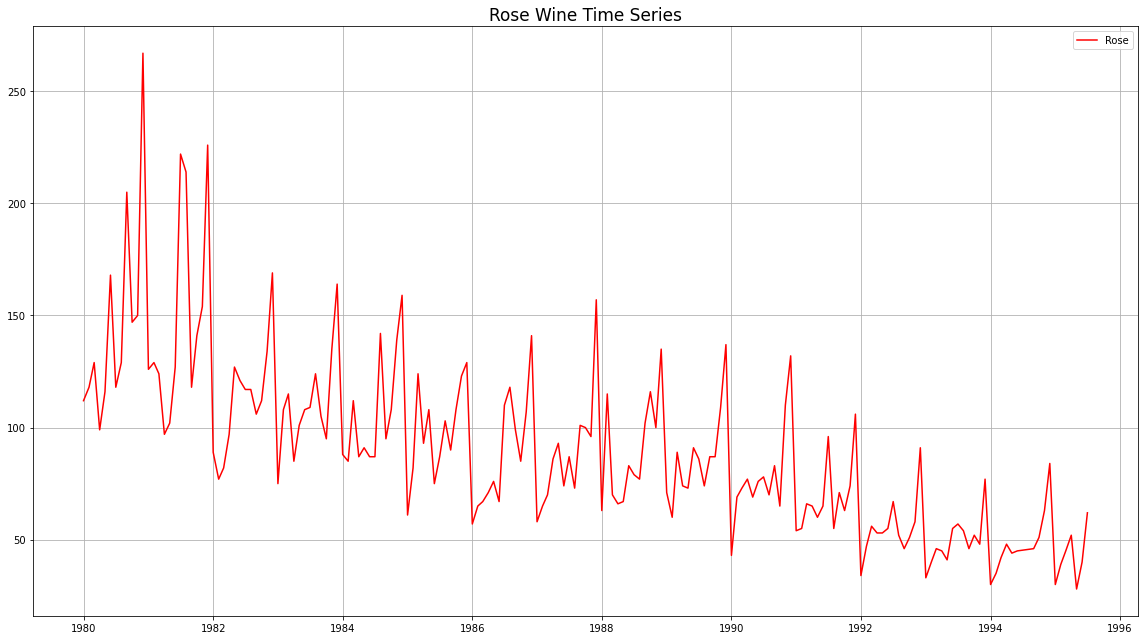

In [13]:
plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');

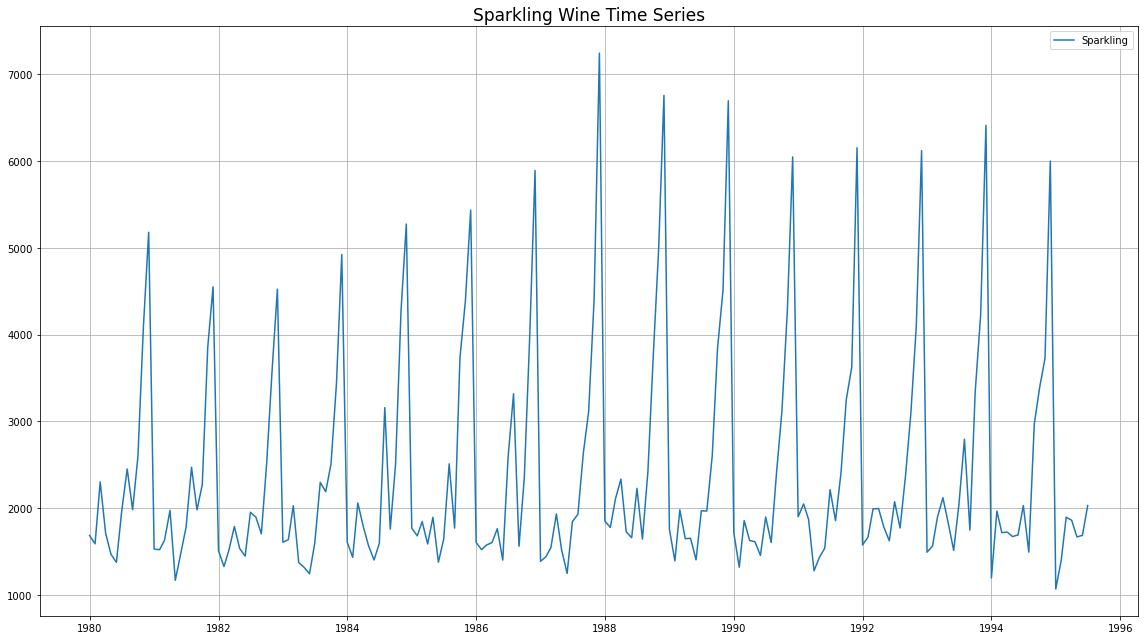

In [14]:
plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');

In [15]:
round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [16]:
round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

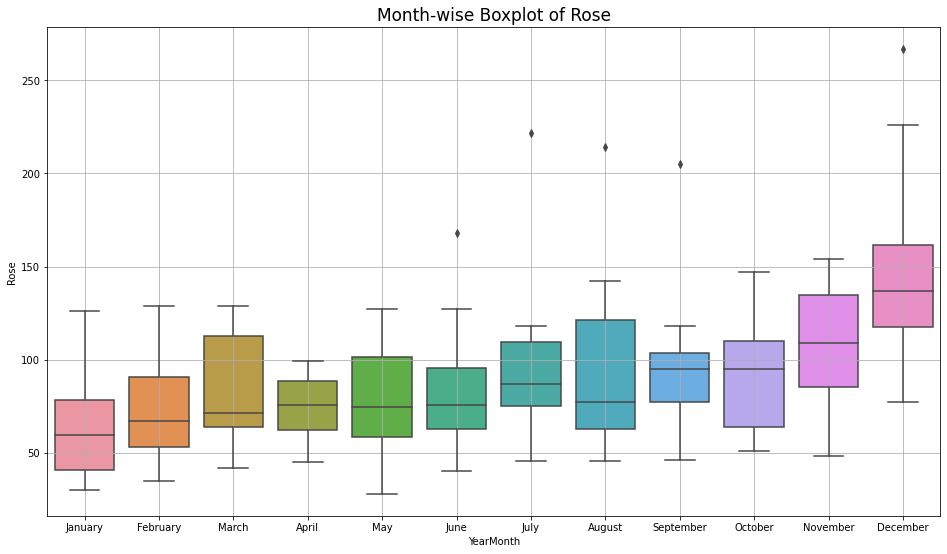

In [17]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

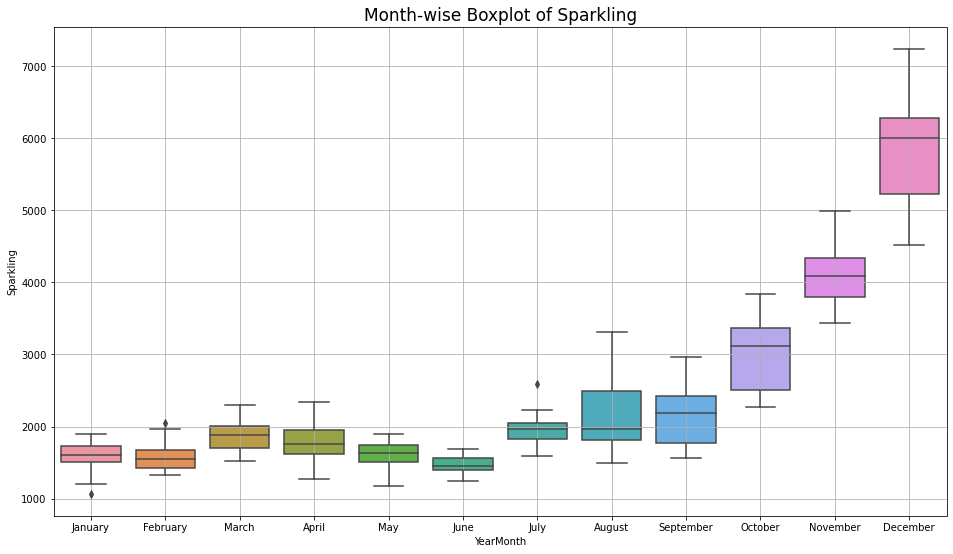

In [18]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

In [19]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

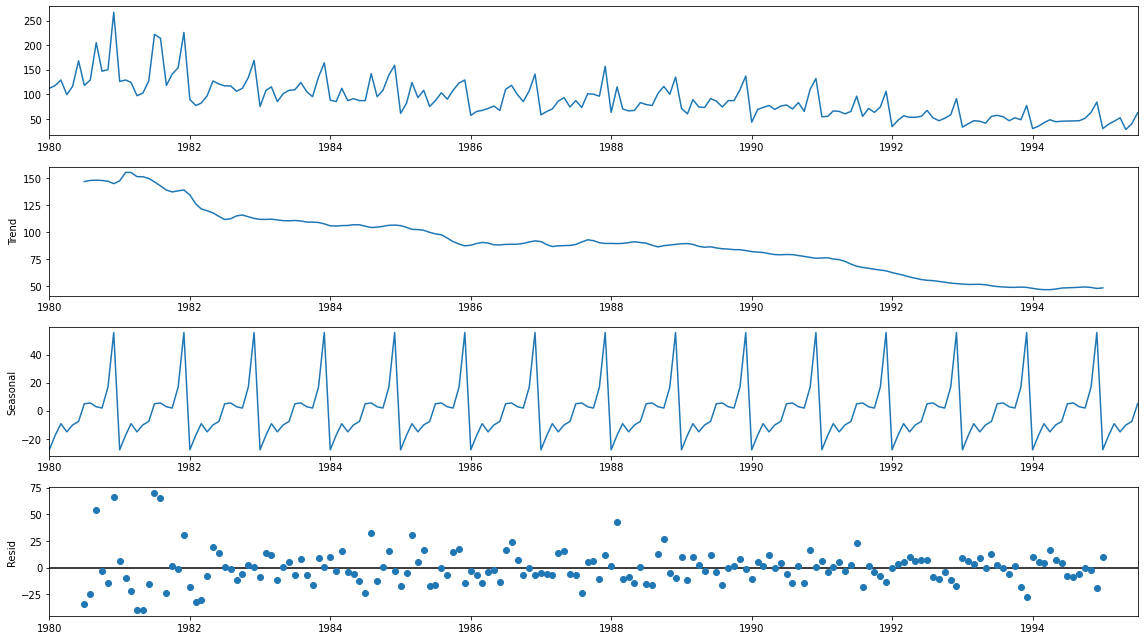

In [20]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');

In [21]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

<AxesSubplot:xlabel='YearMonth'>

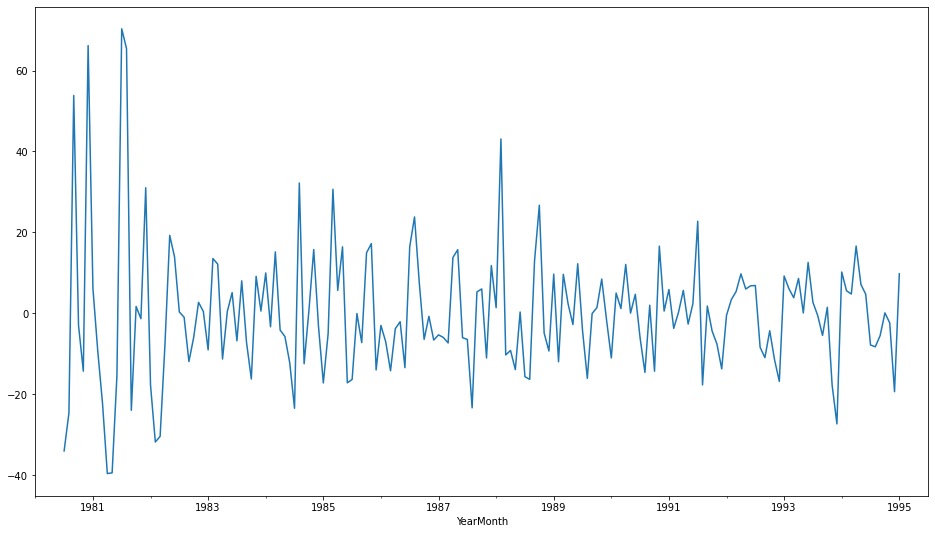

In [22]:
residual.plot()

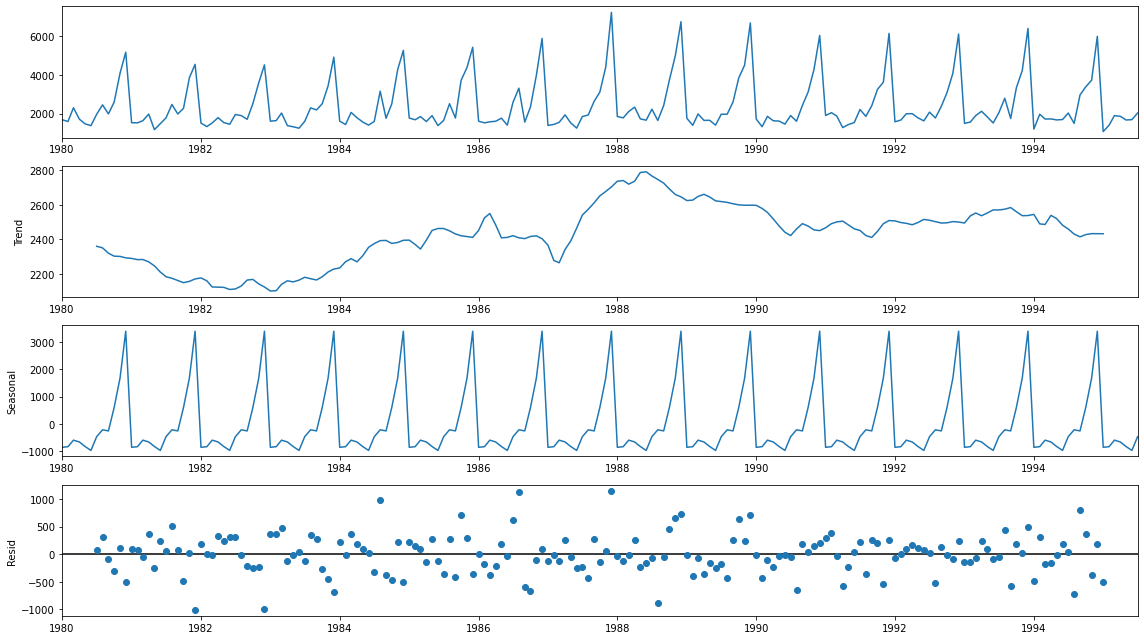

In [23]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');

In [24]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [25]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

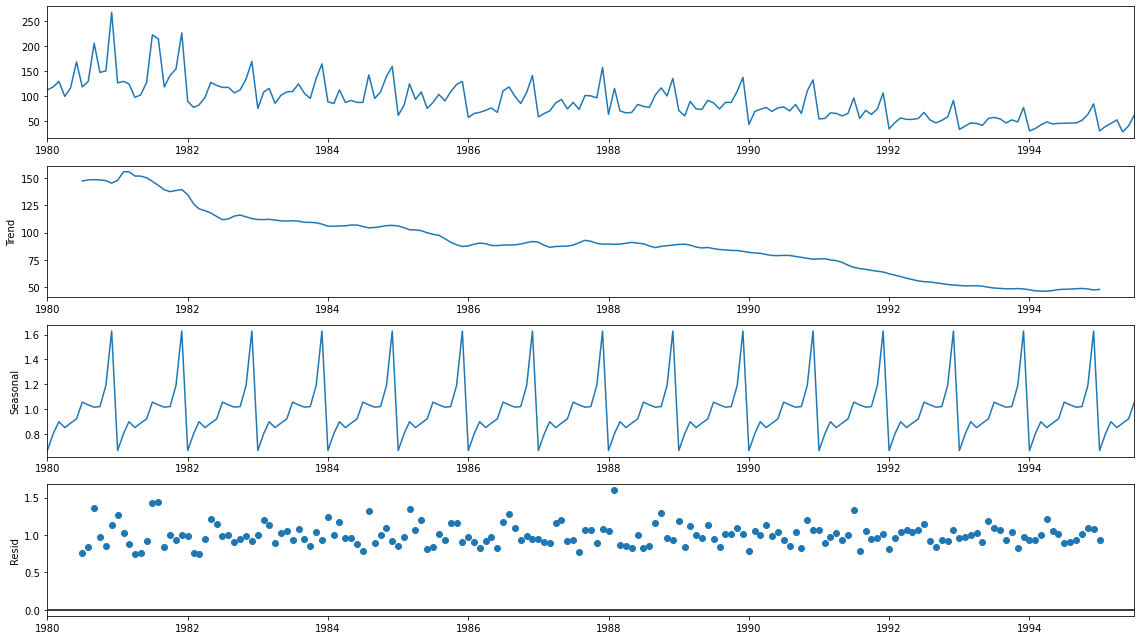

In [26]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [27]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

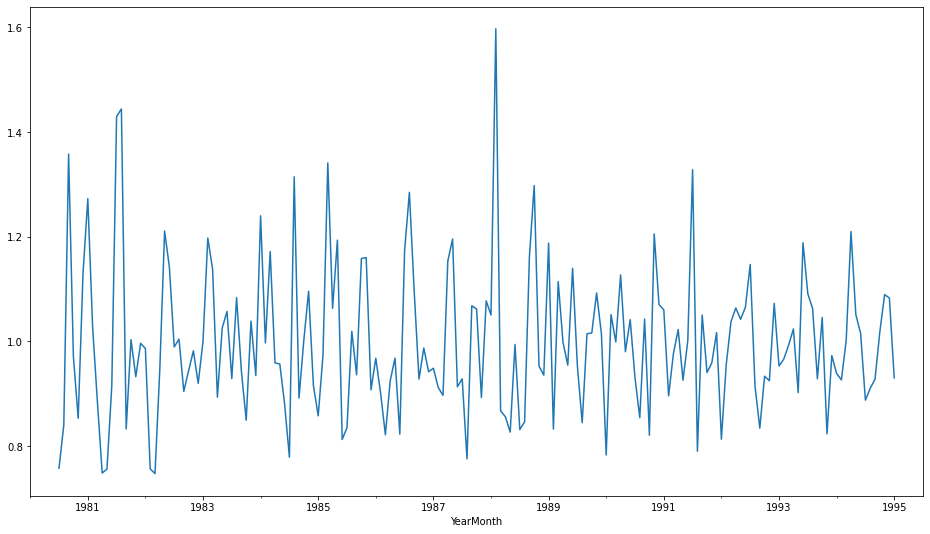

In [28]:
residual.plot()

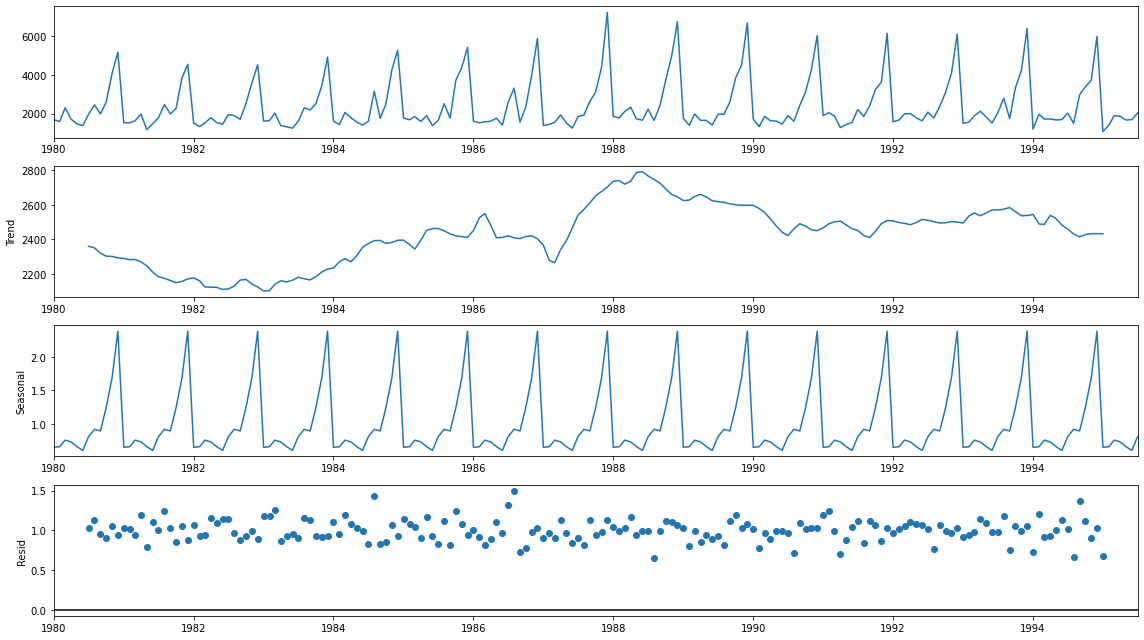

In [29]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [30]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [31]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

In [32]:
rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [33]:
strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [34]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [35]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [36]:
from IPython.display import display

In [37]:
print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [38]:
print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

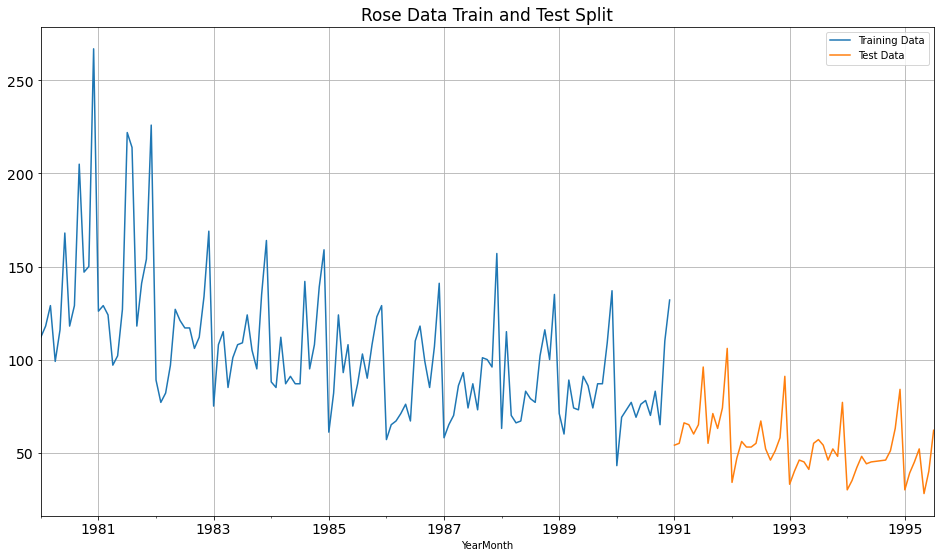

In [39]:
rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

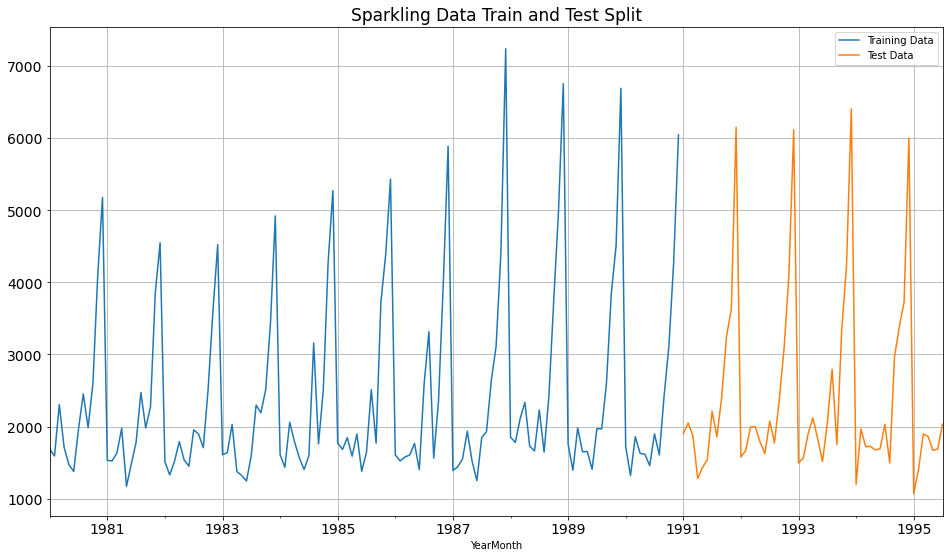

In [40]:
strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

In [41]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [42]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [43]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

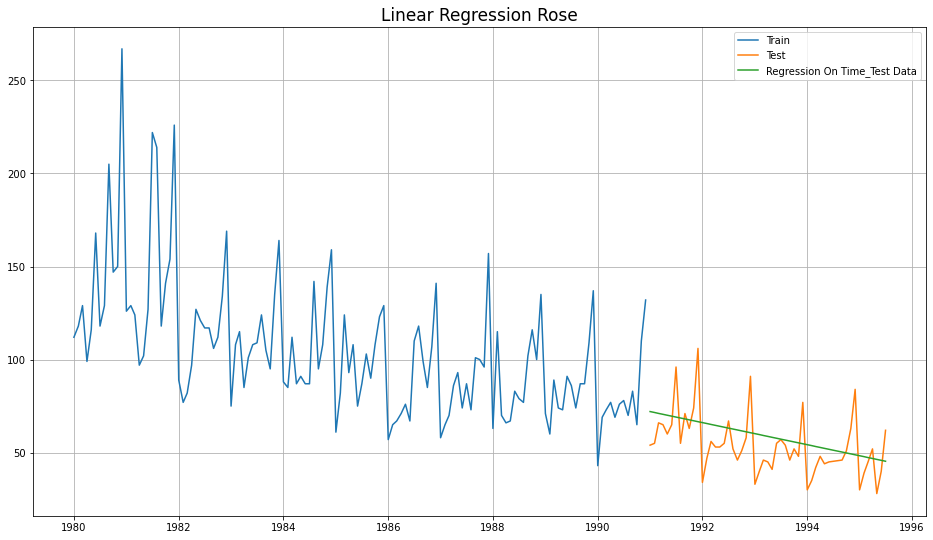

In [48]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

In [49]:
from sklearn import metrics

In [50]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [51]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

In [52]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [53]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [54]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

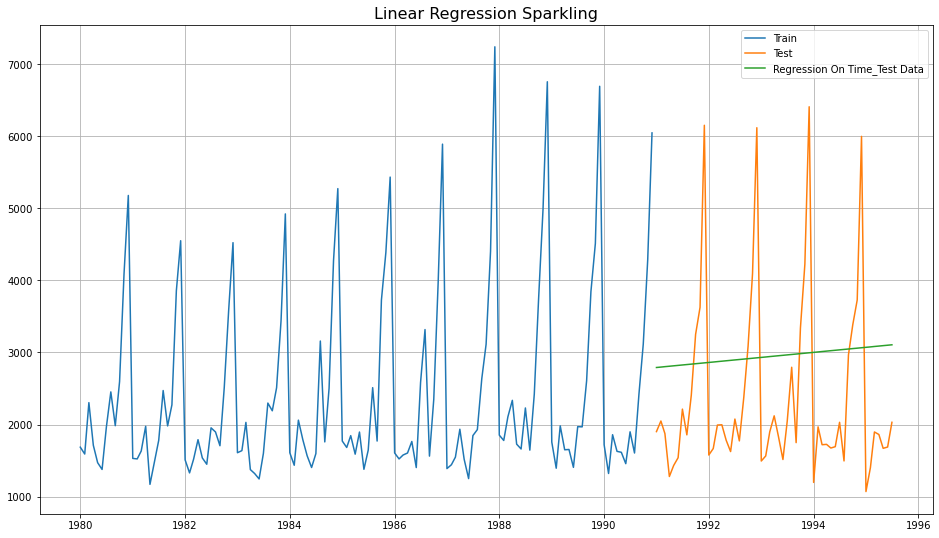

In [58]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

In [59]:
from sklearn import metrics

In [60]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [61]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [62]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [63]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [64]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

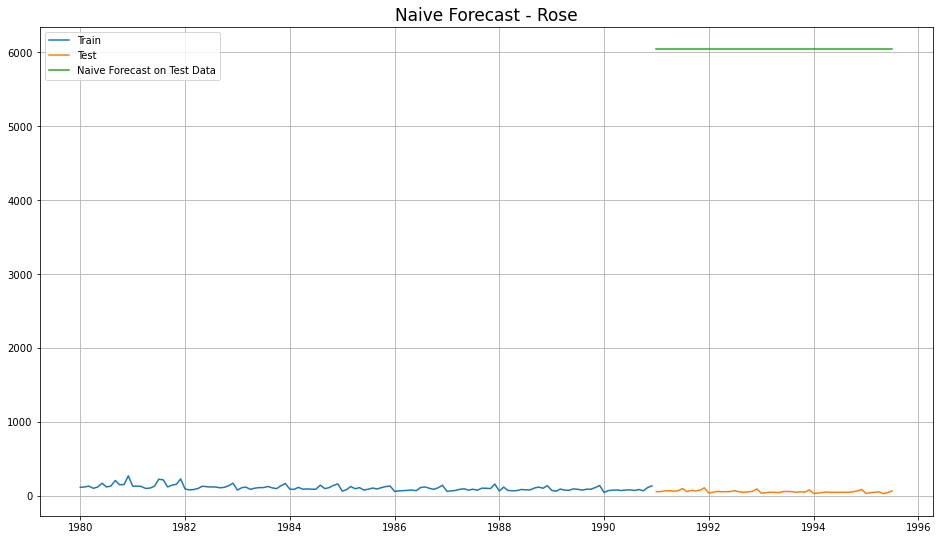

In [75]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

In [66]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [67]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [68]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

In [69]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [70]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [78]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [79]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [80]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [81]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1

Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [82]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [83]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [84]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [85]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

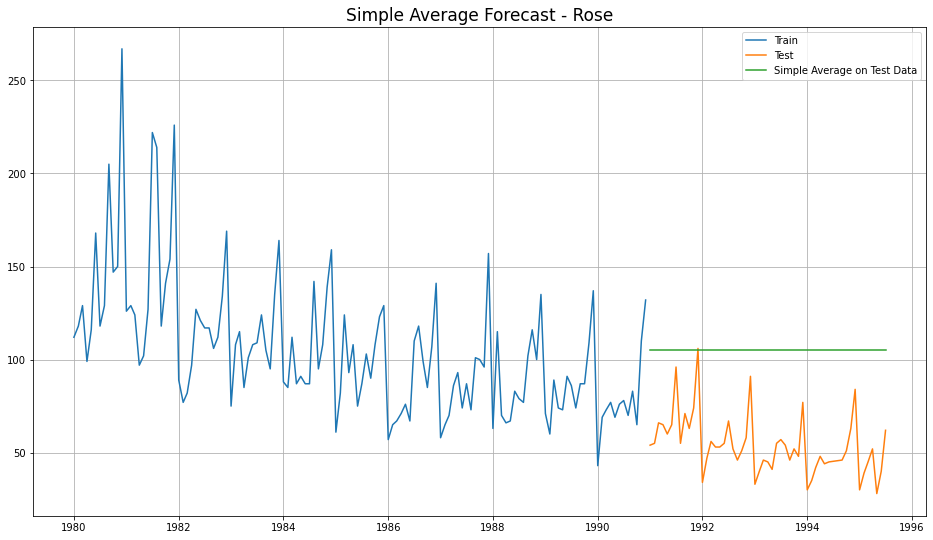

In [86]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');


In [87]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [88]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31

Test RMSE Rose
SimpleAverageModel        53.46057

In [89]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [90]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

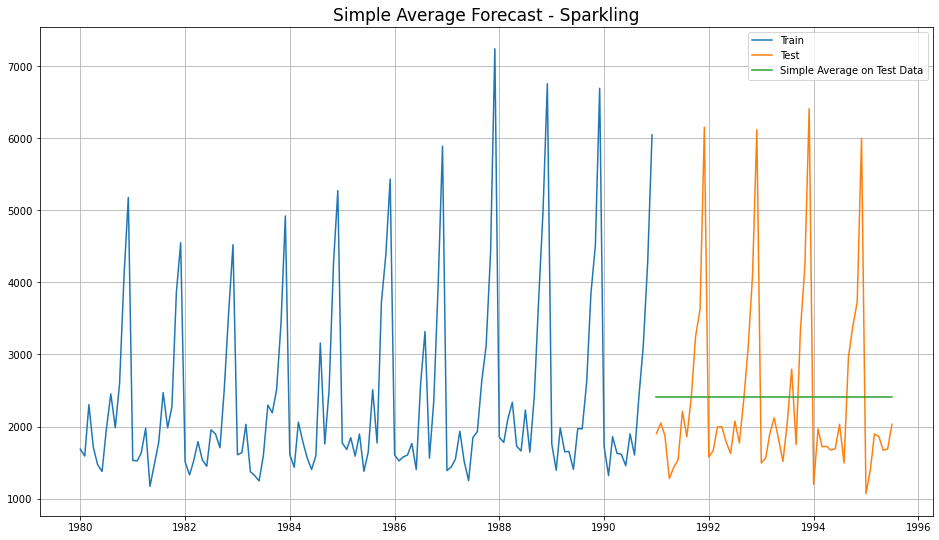

In [91]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

In [92]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [93]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [94]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [95]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [96]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [97]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [98]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

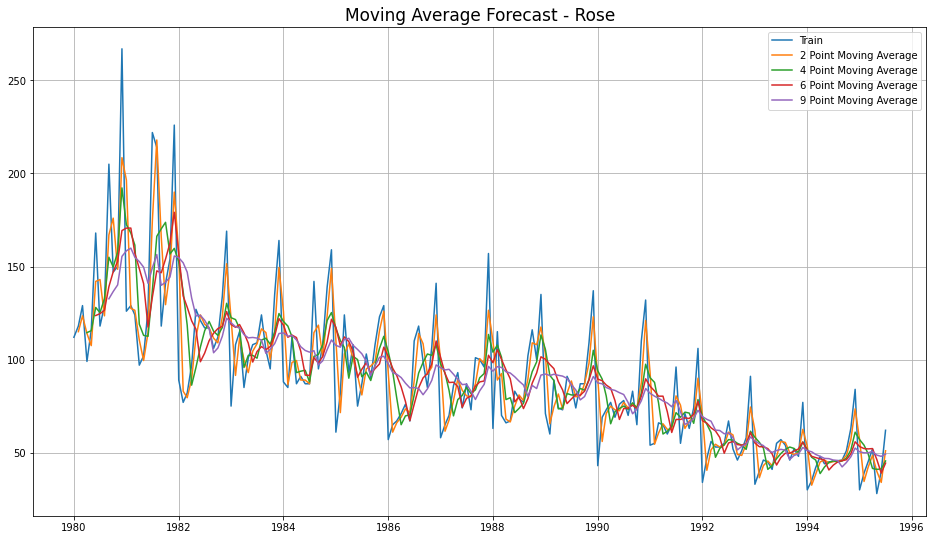

In [99]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');


In [100]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

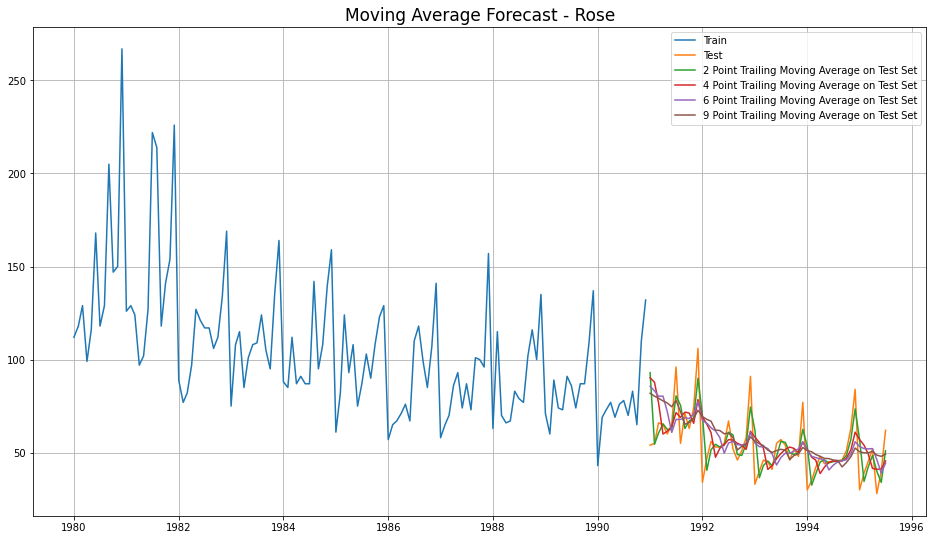

In [101]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

In [102]:
rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))


rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [103]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

In [104]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [105]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

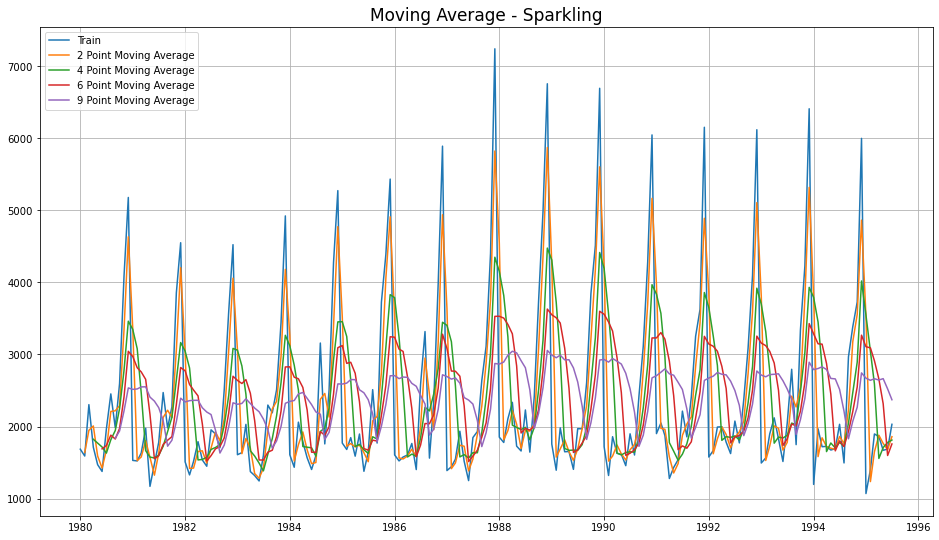

In [106]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

In [107]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

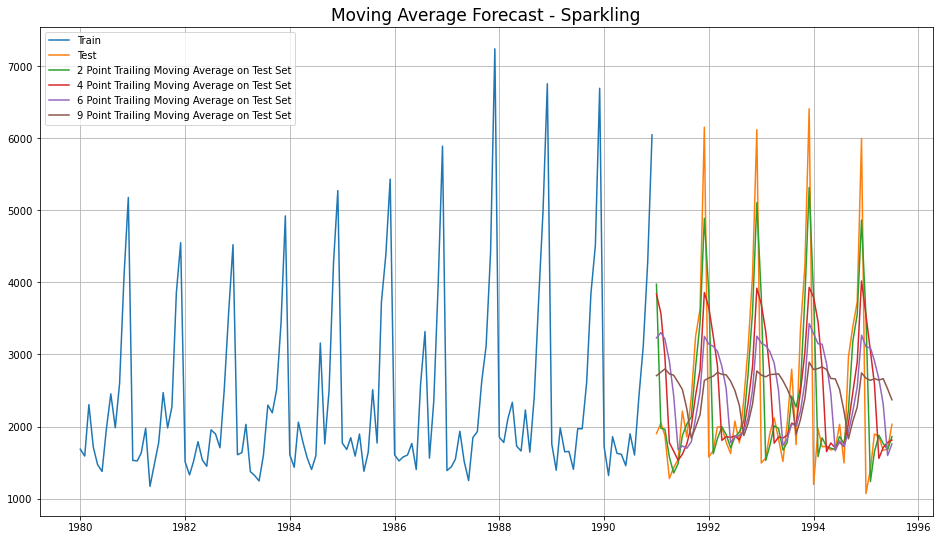

In [108]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');


In [109]:
rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [110]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [111]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [112]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [113]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [114]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

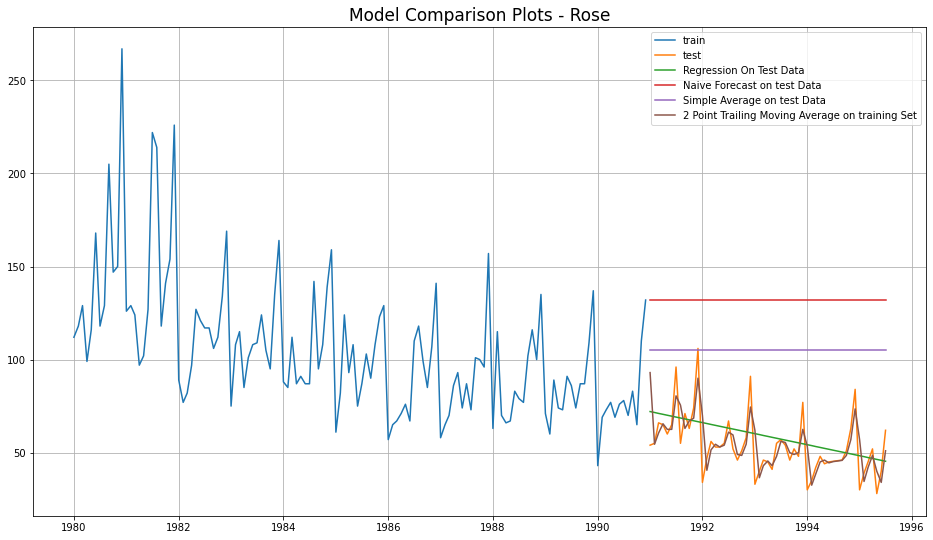

In [115]:
plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

In [116]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

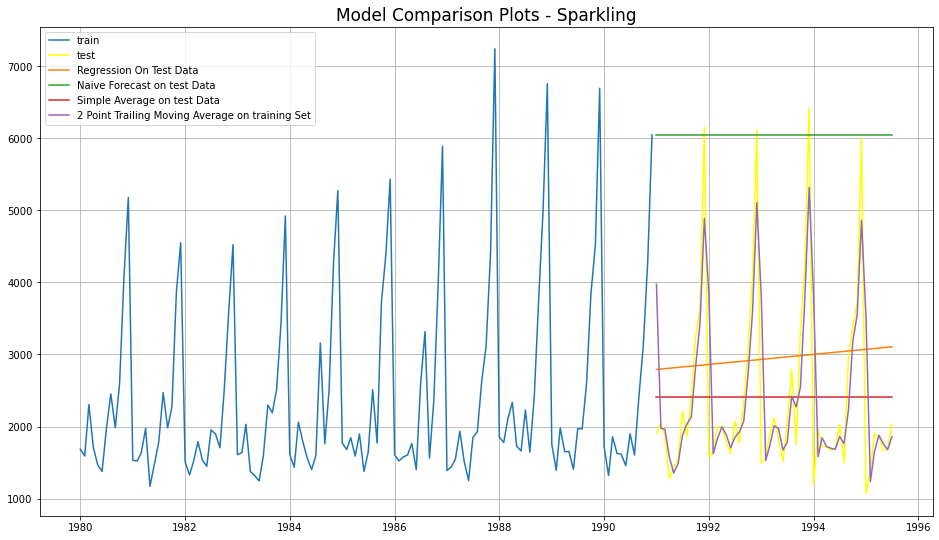

In [117]:
plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

In [118]:
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [119]:
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [120]:
model_SES_autofit = model_SES.fit(optimized=True)

In [121]:
model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1991-01-01    87.104992
1991-02-01    87.104992
1991-03-01    87.104992
1991-04-01    87.104992
1991-05-01    87.104992
1991-06-01    87.104992
1991-07-01    87.104992
1991-08-01    87.104992
1991-09-01    87.104992
1991-10-01    87.104992
1991-11-01    87.104992
1991-12-01    87.104992
1992-01-01    87.104992
1992-02-01    87.104992
1992-03-01    87.104992
1992-04-01    87.104992
1992-05-01    87.104992
1992-06-01    87.104992
1992-07-01    87.104992
1992-08-01    87.104992
1992-09-01    87.104992
1992-10-01    87.104992
1992-11-01    87.104992
1992-12-01    87.104992
1993-01-01    87.104992
1993-02-01    87.104992
1993-03-01    87.104992
1993-04-01    87.104992
1993-05-01    87.104992
1993-06-01    87.104992
1993-07-01    87.104992
1993-08-01    87.104992
1993-09-01    87.104992
1993-10-01    87.104992
1993-11-01    87.104992
1993-12-01    87.104992
1994-01-01    87.104992
1994-02-01    87.104992
1994-03-01    87.104992
1994-04-01    87.104992
1994-05-01    87.104992
1994-06-01    87

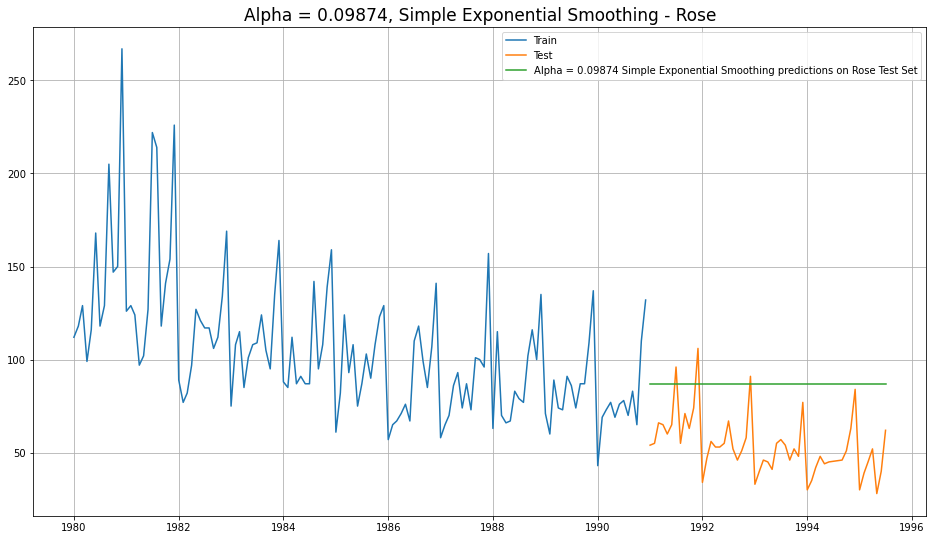

In [123]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [124]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [125]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.796235605069505
SES RMSE (calculated using statsmodels): 36.7962356050695


In [126]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796236

In [127]:
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [128]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [129]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

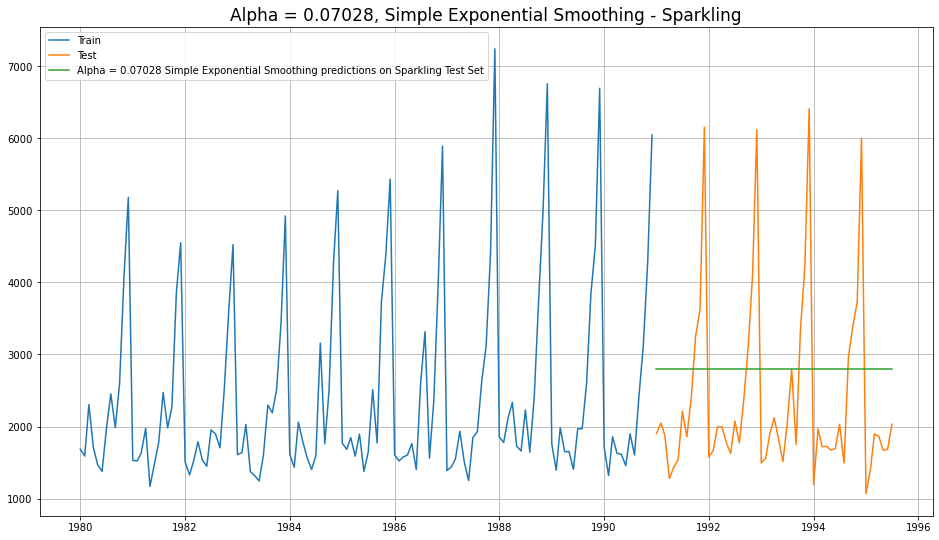

In [131]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [132]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [133]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0008612252468
SES RMSE (calculated using statsmodels): 2750.840900239387


In [134]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.000861

In [135]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796236          1338.000861

In [136]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796236          1338.000861

In [137]:
resultsDf = resultsDf8.copy()

In [138]:
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [139]:
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1991-01-01    72.063269
1991-02-01    71.568892
1991-03-01    71.074514
1991-04-01    70.580136
1991-05-01    70.085758
1991-06-01    69.591381
1991-07-01    69.097003
1991-08-01    68.602625
1991-09-01    68.108247
1991-10-01    67.613870
1991-11-01    67.119492
1991-12-01    66.625114
1992-01-01    66.130736
1992-02-01    65.636358
1992-03-01    65.141981
1992-04-01    64.647603
1992-05-01    64.153225
1992-06-01    63.658847
1992-07-01    63.164470
1992-08-01    62.670092
1992-09-01    62.175714
1992-10-01    61.681336
1992-11-01    61.186959
1992-12-01    60.692581
1993-01-01    60.198203
1993-02-01    59.703825
1993-03-01    59.209447
1993-04-01    58.715070
1993-05-01    58.220692
1993-06-01    57.726314
1993-07-01    57.231936
1993-08-01    56.737559
1993-09-01    56.243181
1993-10-01    55.748803
1993-11-01    55.254425
1993-12-01    54.760047
1994-01-01    54.265670
1994-02-01    53.771292
1994-03-01    53.276914
1994-04-01    52.782536
1994-05-01    52.288159
1994-06-01    51

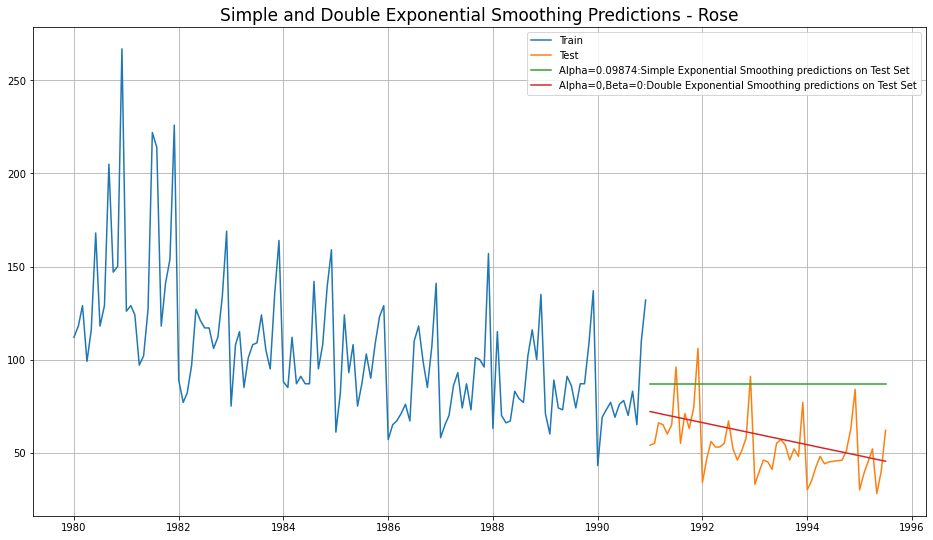

In [140]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');


In [141]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268956852847325


In [142]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.268957

In [143]:
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [144]:
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

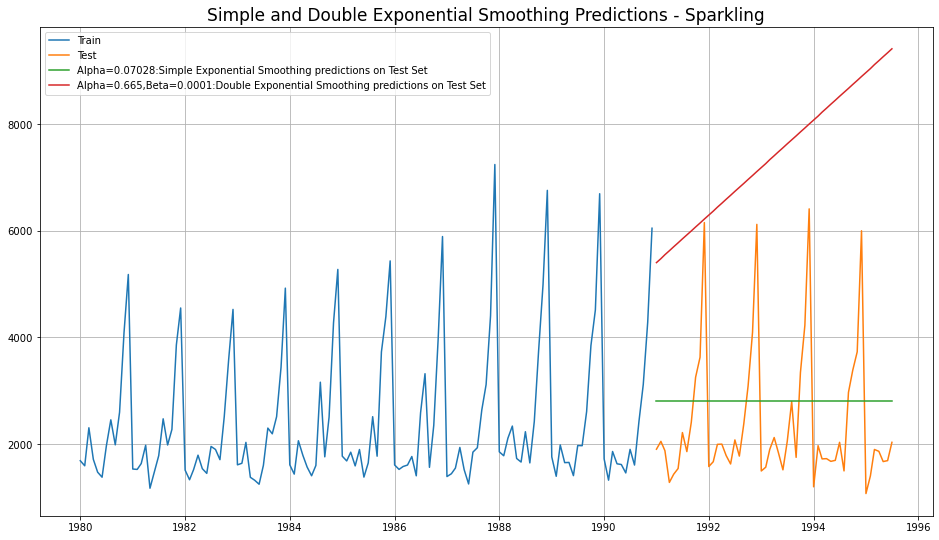

In [145]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');


In [146]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.8798332269125


In [147]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
resultsDf_temp1 

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [148]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9


Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.268957          5291.879833

In [149]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796236          1338.000861
Double Exponential Smoothing       15.268957          5291.879833

In [150]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796236          1338.000861
Double Exponential Smoothing       15.268957          5291.879833

In [151]:
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [152]:
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1991-01-01     42.716117
1991-02-01     54.528923
1991-03-01     61.968476
1991-04-01     50.782306
1991-05-01     59.046436
1991-06-01     63.984756
1991-07-01     73.284643
1991-08-01     78.885632
1991-09-01     74.336035
1991-10-01     71.904228
1991-11-01     89.445446
1991-12-01    131.087464
1992-01-01     36.158278
1992-02-01     47.971084
1992-03-01     55.410637
1992-04-01     44.224467
1992-05-01     52.488597
1992-06-01     57.426917
1992-07-01     66.726804
1992-08-01     72.327793
1992-09-01     67.778196
1992-10-01     65.346389
1992-11-01     82.887606
1992-12-01    124.529625
1993-01-01     29.600439
1993-02-01     41.413245
1993-03-01     48.852798
1993-04-01     37.666628
1993-05-01     45.930758
1993-06-01     50.869078
1993-07-01     60.168965
1993-08-01     65.769954
1993-09-01     61.220357
1993-10-01     58.788550
1993-11-01     76.329767
1993-12-01    117.971785
1994-01-01     23.042600
1994-02-01     34.855406
1994-03-01     42.294959
1994-04-01     31.108789


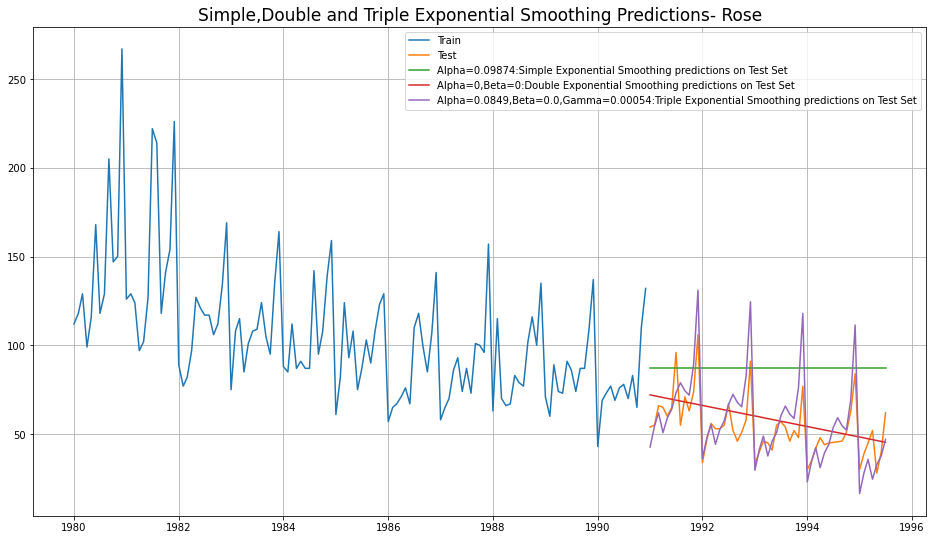

In [153]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

In [154]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.278440376982086


In [155]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)        14.27844

In [156]:
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [157]:
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

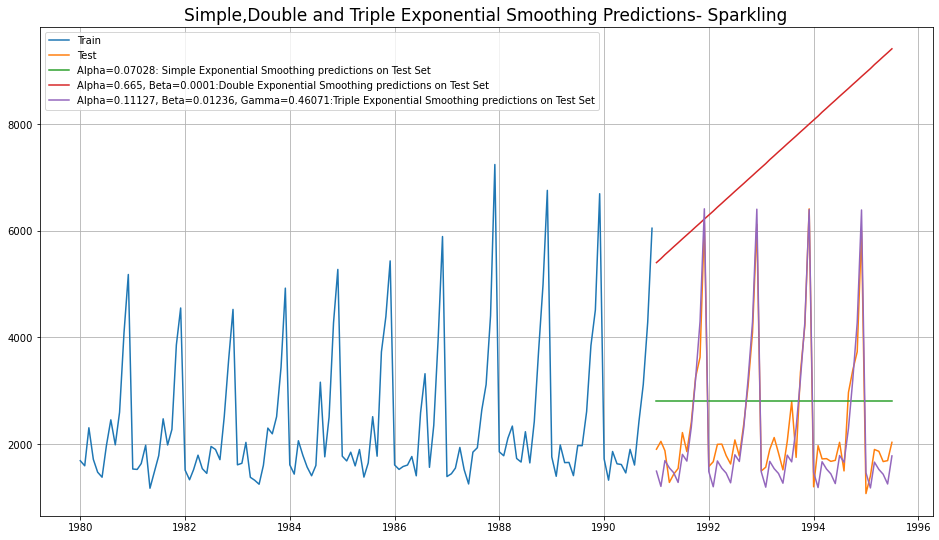

In [158]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');


In [159]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.6258830010025


In [160]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.625883

In [161]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)        14.27844   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.625883

In [162]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796236   
Double Exponential Smoothing                         15.268957   
Triple Exponential Smoothing (Additive Season)       14.278440   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.000861  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           378.625883

In [163]:
resultsDf = resultsDf12.copy()

In [164]:
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07130285749243212, 'smoothing_trend': 0.04550837652110988, 'smoothing_seasonal': 8.385716703273524e-05, 'damping_trend': nan, 'initial_level': 163.60092654560762, 'initial_trend': -0.9804841883026134, 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
       0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
       1.1535151 , 1.59037115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [165]:
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1991-01-01     56.332862
1991-02-01     63.693063
1991-03-01     69.394575
1991-04-01     60.454513
1991-05-01     67.772390
1991-06-01     73.563907
1991-07-01     80.645116
1991-08-01     85.563629
1991-09-01     80.718288
1991-10-01     78.808929
1991-11-01     91.565566
1991-12-01    125.823875
1992-01-01     54.185254
1992-02-01     61.257120
1992-03-01     66.732091
1992-04-01     58.127595
1992-05-01     65.155411
1992-06-01     70.714123
1992-07-01     77.510896
1992-08-01     82.227449
1992-09-01     77.560771
1992-10-01     75.716019
1992-11-01     87.960222
1992-12-01    120.853321
1993-01-01     52.037646
1993-02-01     58.821176
1993-03-01     64.069608
1993-04-01     55.800678
1993-05-01     62.538432
1993-06-01     67.864338
1993-07-01     74.376675
1993-08-01     78.891269
1993-09-01     74.403254
1993-10-01     72.623110
1993-11-01     84.354879
1993-12-01    115.882766
1994-01-01     49.890039
1994-02-01     56.385233
1994-03-01     61.407124
1994-04-01     53.473761


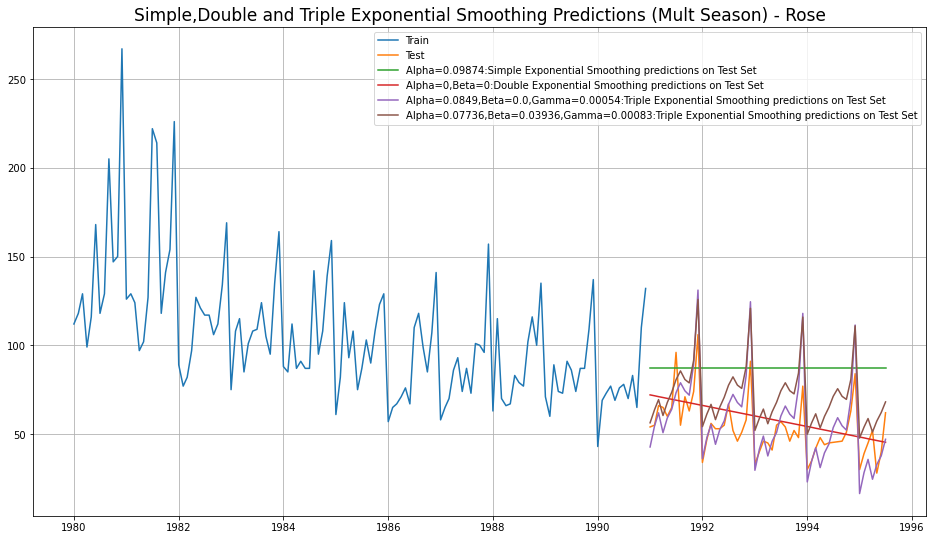

In [166]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

In [167]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.189764216068276


In [168]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp


Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       20.189764

In [169]:
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11101471561088701, 'smoothing_trend': 0.0493145907614654, 'smoothing_seasonal': 0.36244934537370843, 'damping_trend': nan, 'initial_level': 2356.496908624238, 'initial_trend': -9.809526161838415, 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
       0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
       1.87099202, 2.37505867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [170]:
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-01    1587.923122
1991-02-01    1356.650595
1991-03-01    1763.350752
1991-04-01    1656.524633
1991-05-01    1542.386930
1991-06-01    1355.481373
1991-07-01    1854.708133
1991-08-01    1820.662236
1991-09-01    2277.677337
1991-10-01    3123.119233
1991-11-01    4130.016390
1991-12-01    5893.151561
1992-01-01    1539.027193
1992-02-01    1314.768627
1992-03-01    1708.772893
1992-04-01    1605.120587
1992-05-01    1494.400631
1992-06-01    1313.200407
1992-07-01    1796.704221
1992-08-01    1763.574290
1992-09-01    2206.072310
1992-10-01    3024.677525
1992-11-01    3999.494123
1992-12-01    5706.416565
1993-01-01    1490.131264
1993-02-01    1272.886659
1993-03-01    1654.195033
1993-04-01    1553.716542
1993-05-01    1446.414333
1993-06-01    1270.919441
1993-07-01    1738.700308
1993-08-01    1706.486345
1993-09-01    2134.467283
1993-10-01    2926.235817
1993-11-01    3868.971855
1993-12-01    5519.681569
1994-01-01    1441.235336
1994-02-01    1231.004691
1994-03-01  

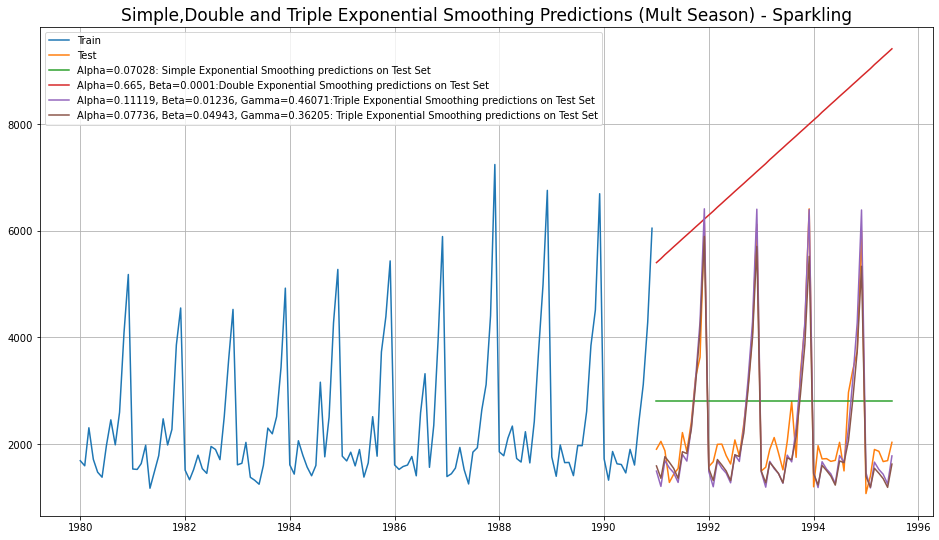

In [171]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

In [172]:

print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 402.93617908586907


In [173]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           402.936179

In [174]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       20.189764   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           402.936179

In [175]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.000861  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.625883  
Triple Exponential Smoothing (Multiplicative Se...           402.936179

In [176]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.000861  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.625883  
Triple Exponential Smoothing (Multiplicative Se...           402.936179

In [177]:
resultsDf.to_csv('results_all.csv')

In [178]:
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.05576252562635662, 'smoothing_trend': 0.005305992534888109, 'smoothing_seasonal': 0.05878872235853221, 'damping_trend': 0.9722544642560742, 'initial_level': 155.574268586621, 'initial_trend': -1.8298254615397305, 'initial_seasons': array([-30.49718663, -18.86650218, -10.7910361 , -22.49193617,
       -13.13956801,  -6.52788915,   3.89063487,  10.67826369,
         6.23734557,   3.58424954,  21.60817404,  66.60468682]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [179]:
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

1991-01-01     49.598970
1991-02-01     62.005544
1991-03-01     69.656532
1991-04-01     59.091392
1991-05-01     67.273440
1991-06-01     72.671181
1991-07-01     82.523757
1991-08-01     88.290210
1991-09-01     85.156157
1991-10-01     83.026411
1991-11-01    101.077367
1991-12-01    144.011504
1992-01-01     48.875087
1992-02-01     61.301745
1992-03-01     68.972260
1992-04-01     58.426106
1992-05-01     66.626612
1992-06-01     72.042300
1992-07-01     81.912324
1992-08-01     87.695742
1992-09-01     84.578183
1992-10-01     82.464474
1992-11-01    100.531021
1992-12-01    143.480316
1993-01-01     48.358637
1993-02-01     60.799625
1993-03-01     68.484071
1993-04-01     57.951462
1993-05-01     66.165138
1993-06-01     71.593629
1993-07-01     81.476102
1993-08-01     87.271623
1993-09-01     84.165831
1993-10-01     82.063563
1993-11-01    100.141234
1993-12-01    143.101343
1994-01-01     47.990180
1994-02-01     60.441390
1994-03-01     68.135776
1994-04-01     57.612831


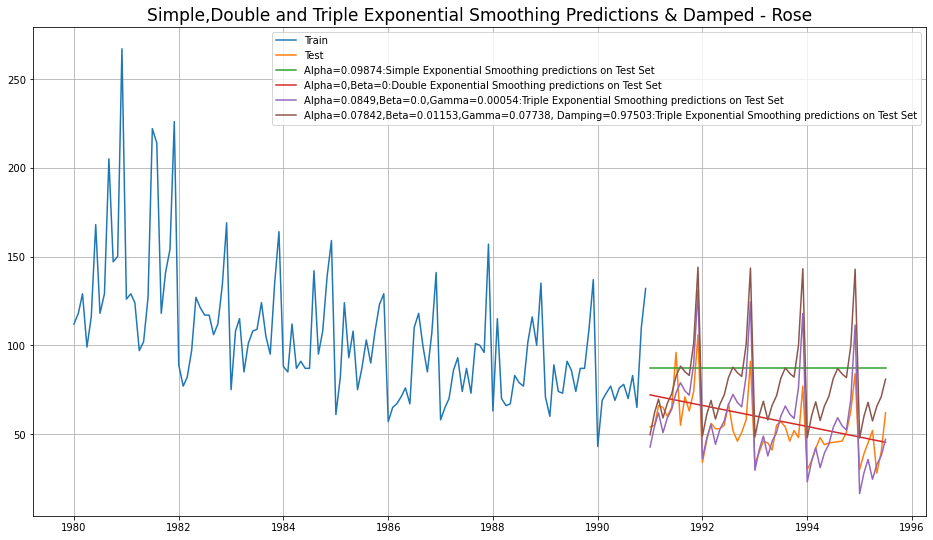

In [180]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [181]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 28.44371868855089


In [182]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       28.443719

In [183]:
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10075452224906478, 'smoothing_trend': 0.00019586493492573397, 'smoothing_seasonal': 0.5116248999734574, 'damping_trend': 0.9702750093602299, 'initial_level': 2382.5654401889665, 'initial_trend': -4.669765189240359, 'initial_seasons': array([-685.85894715, -761.56333406, -313.58576064, -501.96568287,
       -857.93940307, -864.20433824, -389.58072323,  126.66605802,
       -303.54742514,  253.76819228, 1651.27172514, 2673.76582271]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [184]:
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

1991-01-01    1502.577619
1991-02-01    1198.314757
1991-03-01    1697.024057
1991-04-01    1543.400177
1991-05-01    1464.034021
1991-06-01    1284.103610
1991-07-01    1801.284038
1991-08-01    1643.087409
1991-09-01    2325.503379
1991-10-01    3227.241800
1991-11-01    4302.192202
1991-12-01    6456.735239
1992-01-01    1501.519951
1992-02-01    1197.288528
1992-03-01    1696.028333
1992-04-01    1542.434050
1992-05-01    1463.096612
1992-06-01    1283.194066
1992-07-01    1800.401530
1992-08-01    1642.231133
1992-09-01    2324.672556
1992-10-01    3226.435674
1992-11-01    4301.410038
1992-12-01    6455.976325
1993-01-01    1500.783595
1993-02-01    1196.574060
1993-03-01    1695.335102
1993-04-01    1541.761426
1993-05-01    1462.443982
1993-06-01    1282.560835
1993-07-01    1799.787122
1993-08-01    1641.634989
1993-09-01    2324.094132
1993-10-01    3225.874443
1993-11-01    4300.865490
1993-12-01    6455.447963
1994-01-01    1500.270939
1994-02-01    1196.076643
1994-03-01  

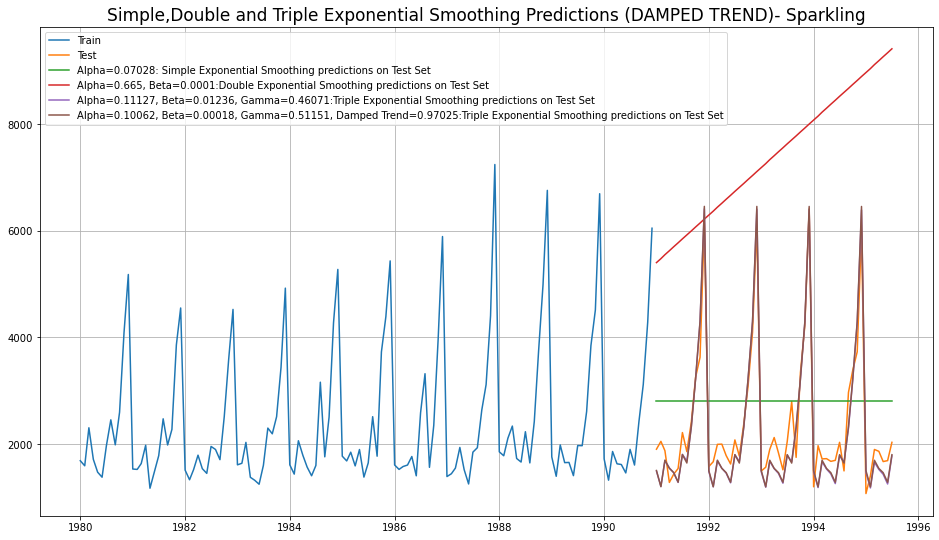

In [185]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [186]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 378.942484620309


In [187]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.625883

In [188]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       28.443719   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           378.625883

In [189]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
Triple Exponential Smoothing (Additive Season, ...       28.443719   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.000861  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.625883  
Triple Exponential Smoothing (Multiplicative Se...           402.936179  
Triple Exponential Smoothing (Additive Season, ...           378.625883

In [190]:
resultsDf = resultsDf12.copy()

In [191]:
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06909064471840766, 'smoothing_trend': 0.027839349639641384, 'smoothing_seasonal': 0.002008677208639091, 'damping_trend': 0.9720215718855828, 'initial_level': 146.23795297100733, 'initial_trend': -1.5477154098305146, 'initial_seasons': array([0.81137676, 0.91992126, 1.00377373, 0.88681775, 0.99013186,
       1.06343307, 1.16536465, 1.24330131, 1.17710007, 1.15738998,
       1.34203583, 1.82583531]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [192]:
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

1991-01-01     57.824375
1991-02-01     65.512396
1991-03-01     71.353420
1991-04-01     62.960235
1991-05-01     70.138304
1991-06-01     75.160766
1991-07-01     82.257348
1991-08-01     87.596639
1991-09-01     82.877039
1991-10-01     81.378572
1991-11-01     94.263699
1991-12-01    127.995695
1992-01-01     56.773493
1992-02-01     64.353063
1992-03-01     70.123941
1992-04-01     61.903966
1992-05-01     68.992668
1992-06-01     73.965550
1992-07-01     80.983915
1992-08-01     86.276508
1992-09-01     81.661204
1992-10-01     80.216470
1992-11-01     92.953442
1992-12-01    126.264011
1993-01-01     56.025900
1993-02-01     63.528319
1993-03-01     69.249295
1993-04-01     61.152541
1993-05-01     68.177668
1993-06-01     73.115279
1993-07-01     80.078001
1993-08-01     85.337374
1993-09-01     80.796265
1993-10-01     79.389756
1993-11-01     92.021332
1993-12-01    125.032099
1994-01-01     55.494067
1994-02-01     62.941600
1994-03-01     68.627077
1994-04-01     60.617981


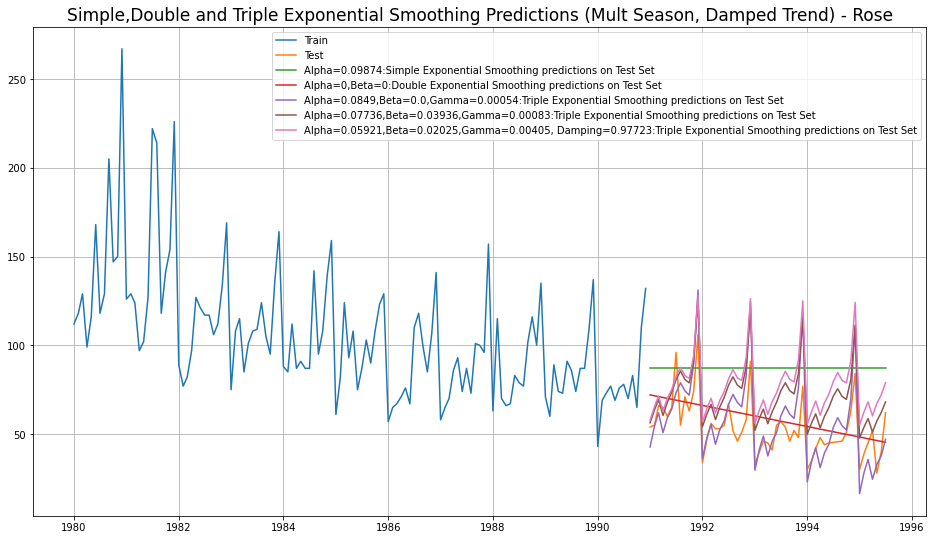

In [193]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

In [194]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.808079418484546


In [195]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       25.808079

In [196]:
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107175247439724, 'smoothing_trend': 0.037023933154358896, 'smoothing_seasonal': 0.3950792583137689, 'damping_trend': 0.9899999231312138, 'initial_level': 2356.5418016413796, 'initial_trend': -9.180240562639177, 'initial_seasons': array([0.71404878, 0.68478677, 0.89930533, 0.80522779, 0.65413464,
       0.65545066, 0.88084612, 1.12159894, 0.91446536, 1.19237831,
       1.84832087, 2.33635702]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [197]:
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.419929
1991-02-01    1348.089910
1991-03-01    1768.337440
1991-04-01    1654.050370
1991-05-01    1548.113907
1991-06-01    1363.576185
1991-07-01    1862.877685
1991-08-01    1797.362760
1991-09-01    2310.534563
1991-10-01    3163.683438
1991-11-01    4176.962691
1991-12-01    5994.206910
1992-01-01    1558.917869
1992-02-01    1320.783696
1992-03-01    1732.813764
1992-04-01    1621.096591
1992-05-01    1517.525505
1992-06-01    1336.856928
1992-07-01    1826.677221
1992-08-01    1762.725451
1992-09-01    2266.378199
1992-10-01    3103.726404
1992-11-01    4098.463006
1992-12-01    5882.496619
1993-01-01    1530.108562
1993-02-01    1296.579903
1993-03-01    1701.326145
1993-04-01    1591.886887
1993-05-01    1490.412433
1993-06-01    1313.173405
1993-07-01    1794.589707
1993-08-01    1732.023493
1993-09-01    2227.238703
1993-10-01    3050.581445
1993-11-01    4028.882138
1993-12-01    5783.478398
1994-01-01    1504.572452
1994-02-01    1275.126048
1994-03-01  

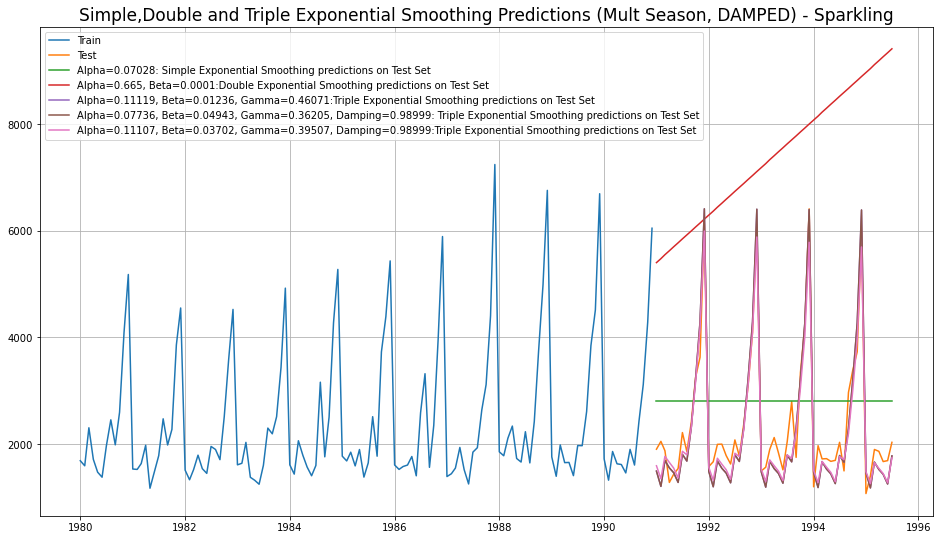

In [198]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

In [199]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.44350255476866


In [200]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1


Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.443503

In [201]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       25.808079   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           352.443503

In [202]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
Triple Exponential Smoothing (Additive Season, ...       28.443719   
Triple Exponential Smoothing (Multiplicative Se...       25.808079   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.000861  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.625883  
Triple Exponential Smoothing (Multiplicative Se...           402.936179  
Triple Exponential Smoothing (Additive Season, ...           378.625883  
Triple Exponential Smoothing (Multiplicative Se...           352.443503

In [203]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
Triple Exponential Smoothing (Additive Season, ...       28.443719   
Triple Exponential Smoothing (Multiplicative Se...       25.808079   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.000861  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.625883  
Triple Exponential Smoothing (Multiplicative Se...           402.936179  
Triple Exponential Smoothing (Additive Season, ...           378.625883  
Triple Exponential Smoothing (Multiplicative Se...           352.443503

In [204]:
resultsDf.to_csv('results_all.csv')

In [205]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [206]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [207]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

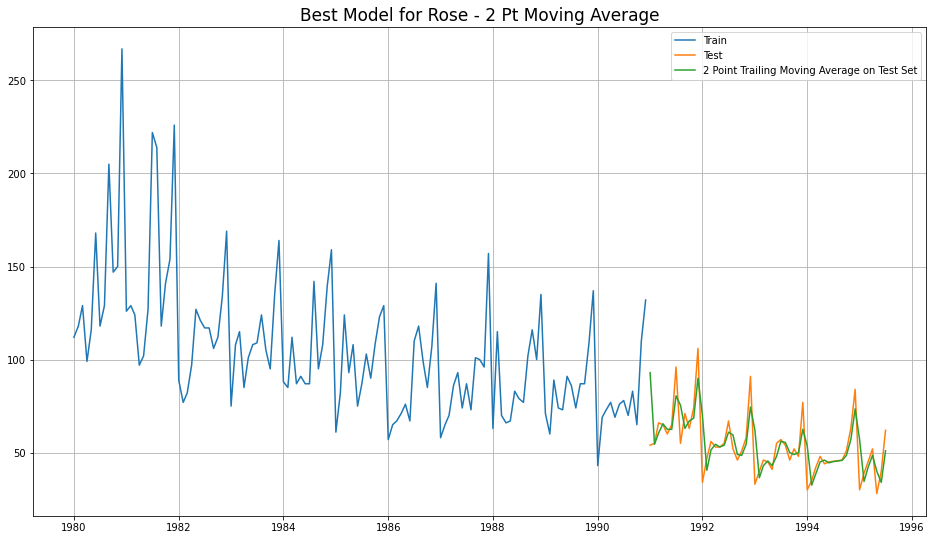

In [208]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

In [209]:
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107175247439724, 'smoothing_trend': 0.037023933154358896, 'smoothing_seasonal': 0.3950792583137689, 'damping_trend': 0.9899999231312138, 'initial_level': 2356.5418016413796, 'initial_trend': -9.180240562639177, 'initial_seasons': array([0.71404878, 0.68478677, 0.89930533, 0.80522779, 0.65413464,
       0.65545066, 0.88084612, 1.12159894, 0.91446536, 1.19237831,
       1.84832087, 2.33635702]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [210]:
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.419929
1991-02-01    1348.089910
1991-03-01    1768.337440
1991-04-01    1654.050370
1991-05-01    1548.113907
1991-06-01    1363.576185
1991-07-01    1862.877685
1991-08-01    1797.362760
1991-09-01    2310.534563
1991-10-01    3163.683438
1991-11-01    4176.962691
1991-12-01    5994.206910
1992-01-01    1558.917869
1992-02-01    1320.783696
1992-03-01    1732.813764
1992-04-01    1621.096591
1992-05-01    1517.525505
1992-06-01    1336.856928
1992-07-01    1826.677221
1992-08-01    1762.725451
1992-09-01    2266.378199
1992-10-01    3103.726404
1992-11-01    4098.463006
1992-12-01    5882.496619
1993-01-01    1530.108562
1993-02-01    1296.579903
1993-03-01    1701.326145
1993-04-01    1591.886887
1993-05-01    1490.412433
1993-06-01    1313.173405
1993-07-01    1794.589707
1993-08-01    1732.023493
1993-09-01    2227.238703
1993-10-01    3050.581445
1993-11-01    4028.882138
1993-12-01    5783.478398
1994-01-01    1504.572452
1994-02-01    1275.126048
1994-03-01  

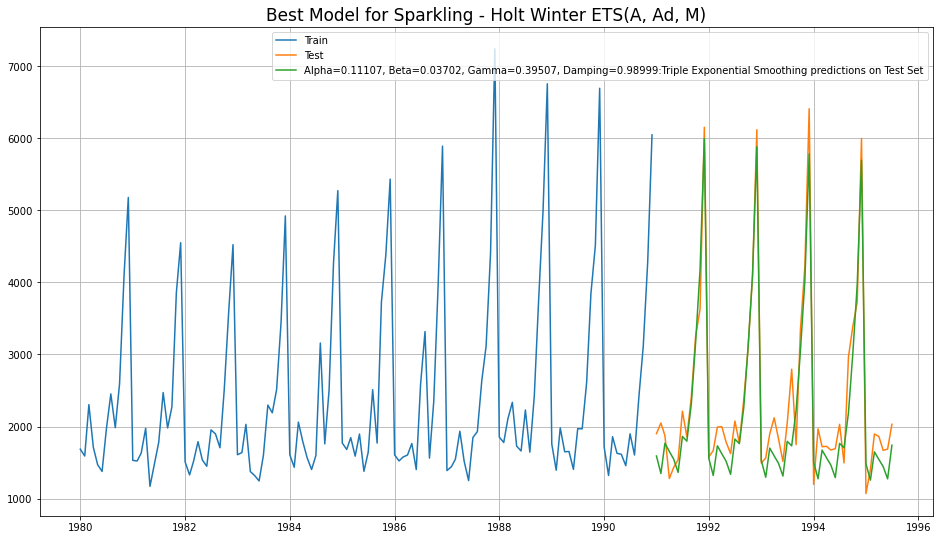

In [211]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

In [212]:
from statsmodels.tsa.stattools import adfuller

In [213]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793168
Number of lags used 13


In [214]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827353e-11
Number of lags used 12


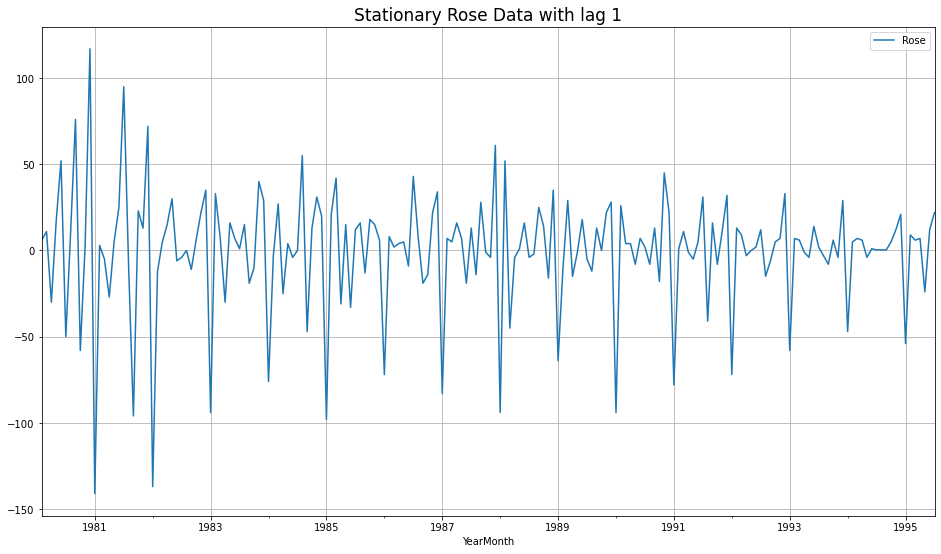

In [215]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');


In [216]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932692
Number of lags used 12


In [217]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


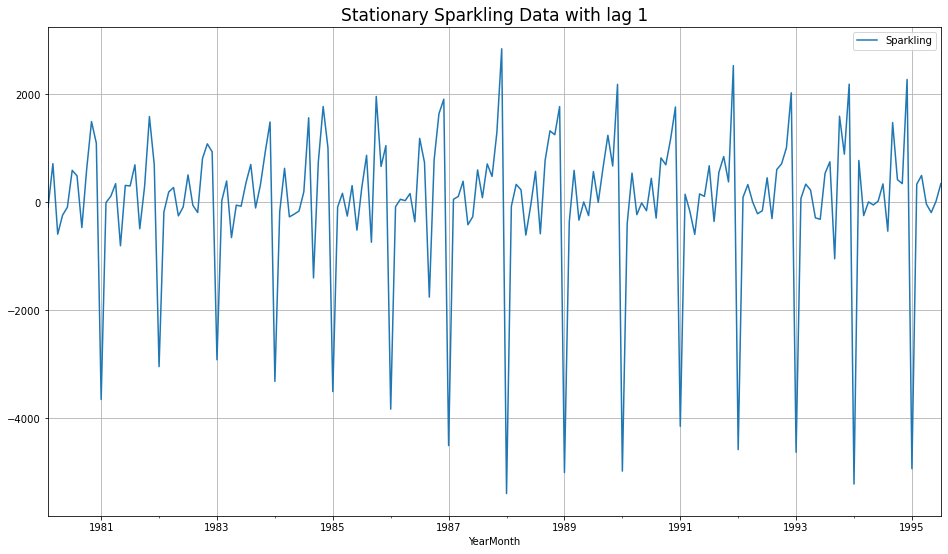

In [218]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');

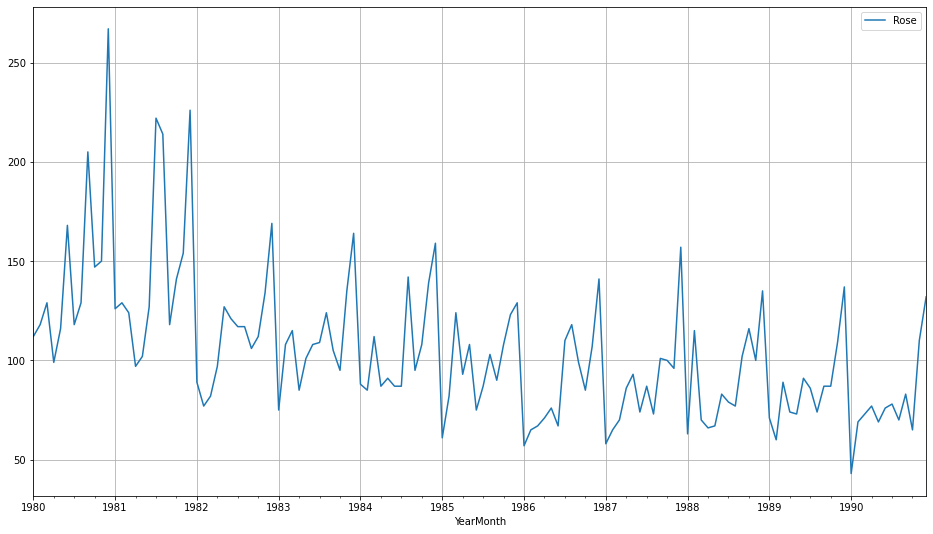

In [219]:
rtrain.plot(grid=True);

In [220]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047106
Number of lags used 13


In [221]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356781761e-08
Number of lags used 12


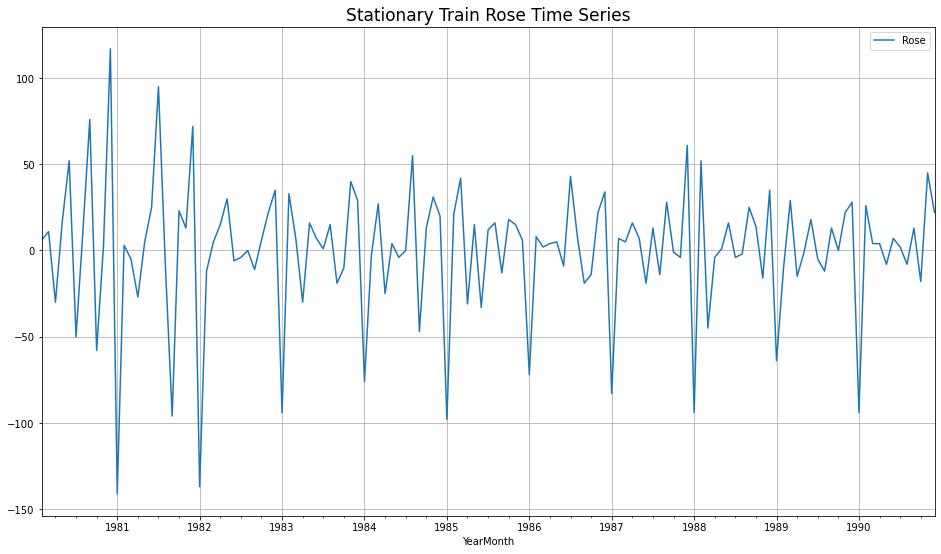

In [222]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [223]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [224]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [225]:
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [226]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868424
ARIMA(2, 1, 2) - AIC:1281.8707222264402


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6953561209548
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271946
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6619652725685


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [227]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695356
15  (3, 1, 3)  1278.661965
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [228]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 19 Feb 2022   AIC                           1274.695
Time:                        02:33:14   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.628      1.665      0.0

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


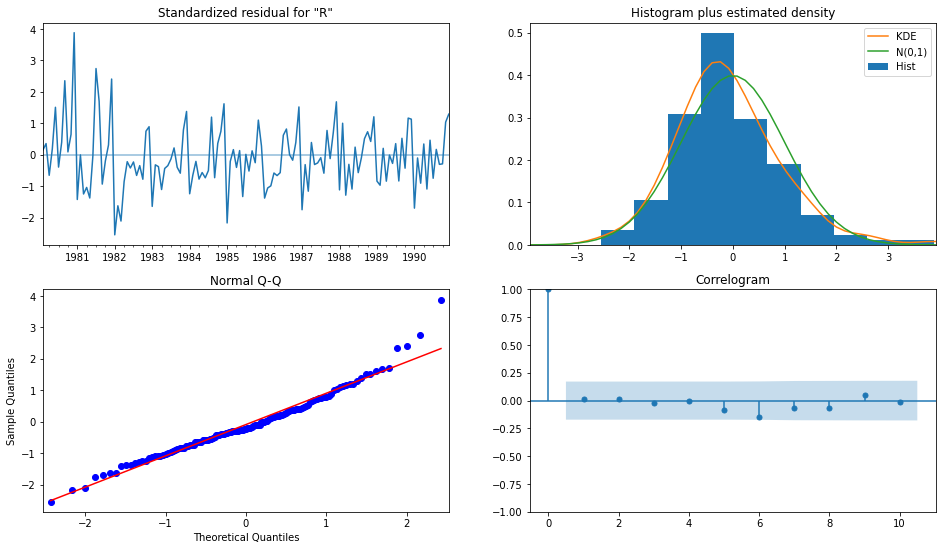

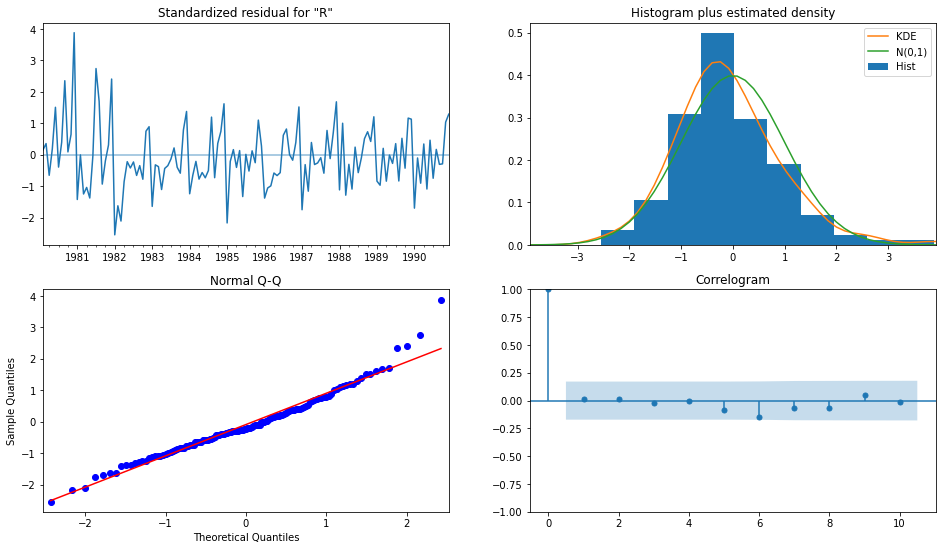

In [229]:
results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

In [230]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.605078
1991-02-01    90.532552
1991-03-01    81.968167
1991-04-01    92.748215
1991-05-01    80.900983
1991-06-01    92.924087
1991-07-01    81.383696
1991-08-01    91.985881
1991-09-01    82.606225
1991-10-01    90.618235
1991-11-01    84.010151
1991-12-01    89.259200
1992-01-01    85.267413
1992-02-01    88.139999
1992-03-01    86.229119
1992-04-01    87.341950
1992-05-01    86.867334
1992-06-01    86.852661
1992-07-01    87.223215
1992-08-01    86.612100
1992-09-01    87.367501
1992-10-01    86.545316
1992-11-01    87.374402
1992-12-01    86.582413
1993-01-01    87.307122
1993-02-01    86.668274
1993-03-01    87.212081
1993-04-01    86.765177
1993-05-01    87.118744
1993-06-01    86.851173
1993-07-01    87.042469
1993-08-01    86.916486
1993-09-01    86.988463
1993-10-01    86.959507
1993-11-01    86.955635
1993-12-01    86.983237
1994-01-01    86.939742
1994-02-01    86.992612
1994-03-01    86.935595
1994-04-01    86.992737
1994-05-01    86.938408
1994-06-01    86

In [238]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

from sklearn.metrics import mean_squared_error

In [240]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.813470393936946 
MAPE: 75.84004193784372


In [241]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)        36.81347       75.840042

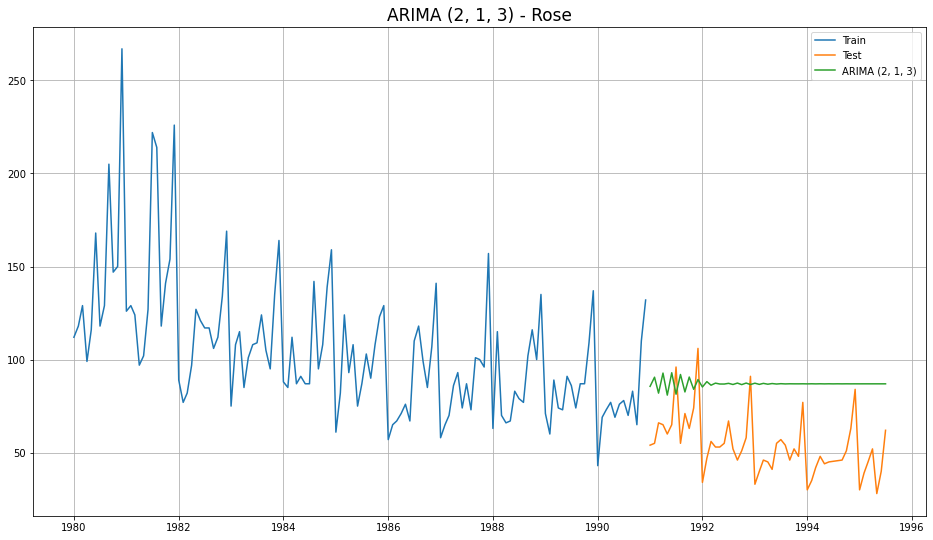

In [242]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

In [243]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

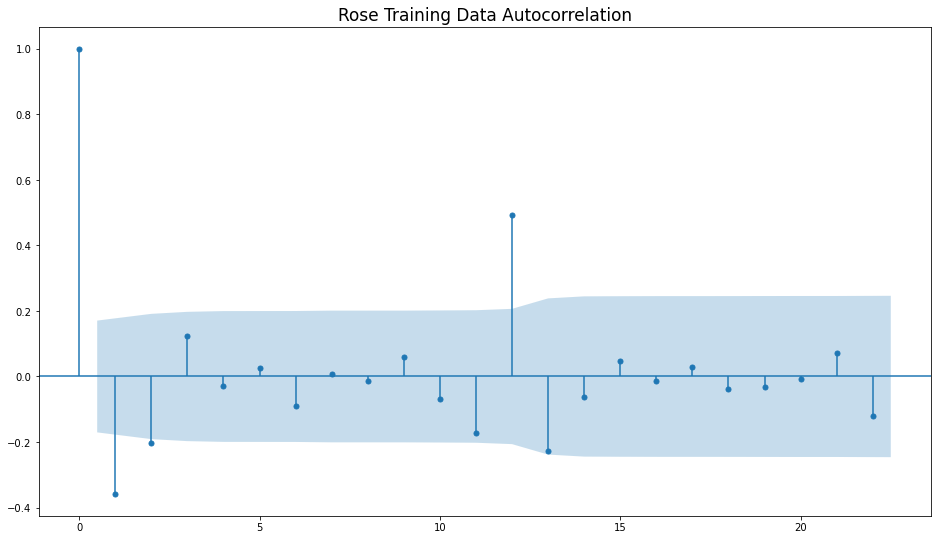

In [244]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');

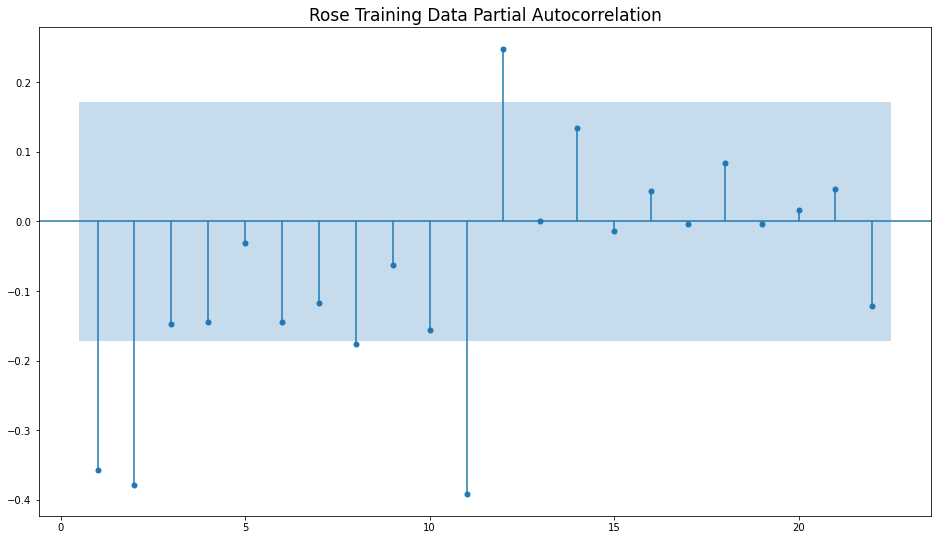

In [245]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');

In [246]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 19 Feb 2022   AIC                           1281.871
Time:                        02:39:57   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


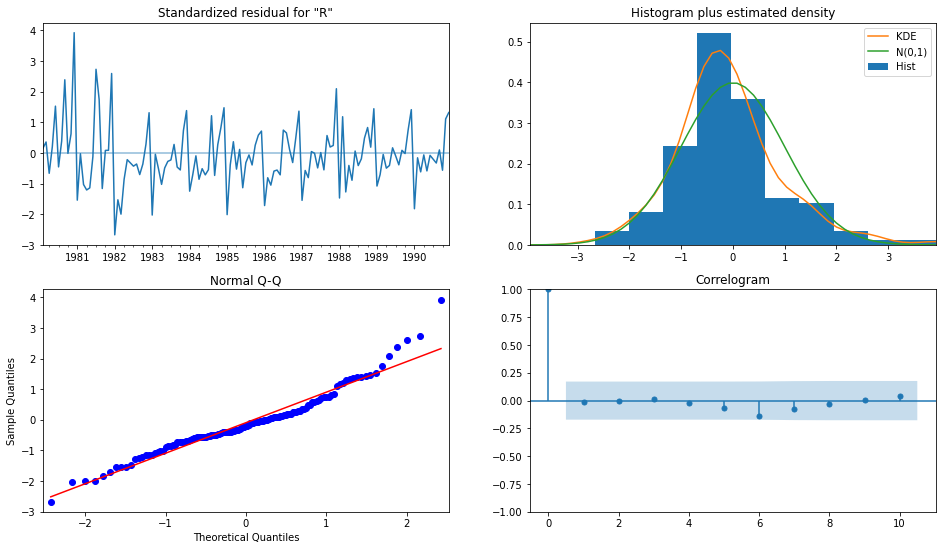

In [247]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

In [248]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [249]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119661804801 
MAPE: 76.05621271441845


In [250]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.813470       75.840042
ARIMA(2,1,2)       36.871197       76.056213

In [251]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.813470       75.840042
ARIMA(2,1,2)       36.871197       76.056213

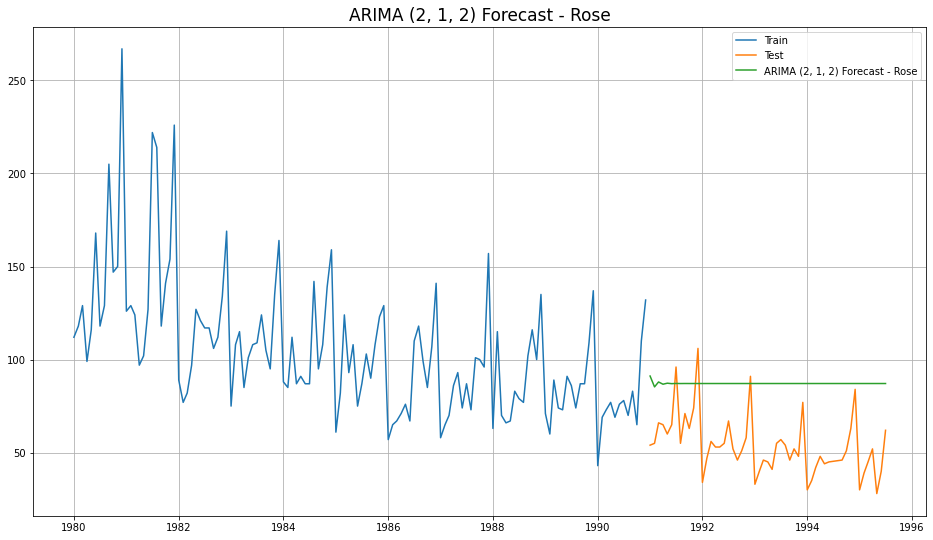

In [252]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');


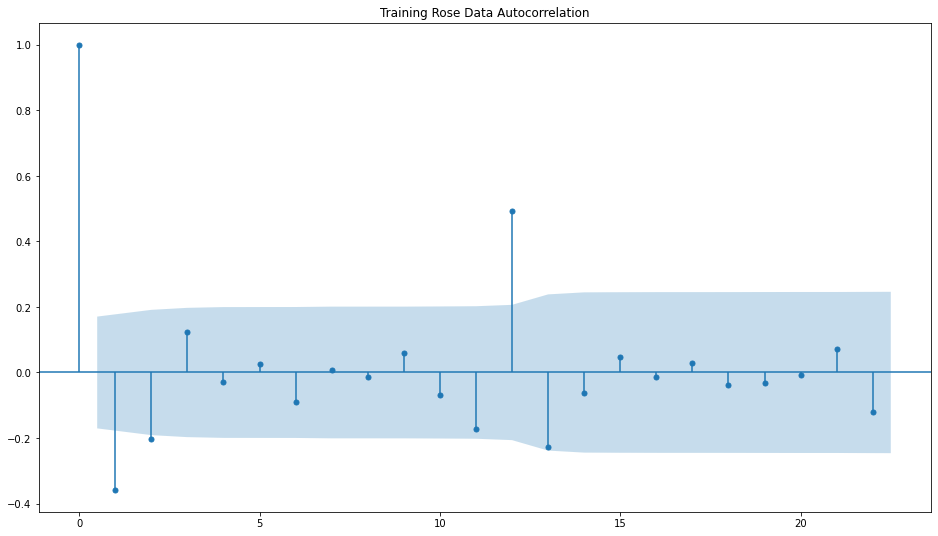

In [253]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [254]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [255]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [256]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207386
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380902


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4181.96632489662
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385767
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753415


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4017.4122600881783
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945691
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3850.7832266878013
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702714087
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128291


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3858.7831177231424
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383831


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3932.466538840468
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947592
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483295111


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3900.407838343856
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988310335219


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3765.000863766753
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764816959
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932689858
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269310302


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3725.2083394077767
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054106
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264868
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2510.0199648216417
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413757
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933547742
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.83109136078


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2644.5574756375777
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257976
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545051985
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680056


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3764.0096965343546
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374651
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080534338
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528412278


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3422.294270825726
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739109
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.763264607837
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380583


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3672.2210524775146
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121227
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212934789
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340173


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3871.7697629011927
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.947710898705
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996903726
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253402


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3514.942822674445
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124799054
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772318107
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150722577793


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3346.8440747106056
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295544758571
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257691


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3763.5634717473104
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804594
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055025245
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948467


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3726.545278467306
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664086
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071384


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3092.2705906509336
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272404
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.150137157357
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086795685
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3427.744834127828
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640711
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063866
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4038.0595737790277
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031155
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547134137
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428505619
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4006.0262787619913
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060839028
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470778
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936801


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3485.899595664804
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439381729
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447841288
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850295551
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3756.377239570339
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706227
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101027
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402494727


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3923.059436891989
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760928442033
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211327557
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318499471753


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3892.3469837489247
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196656119
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827969797
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869004524776


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3693.796868596326
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801474945
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805905303
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390273840477


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3540.522179086855
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531617
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849740065406
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105125031


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3150.3378516059593
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675933
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928680253
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291491362


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3189.3281324540635
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687610341547
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660093145
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886583916328
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3575.7812309863834
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903136093145
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140235927
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467958162104
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3411.9891205880704
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471144
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829955
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4081.3505369379322
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641096
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559142


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4045.5948646400198
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645493
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384188
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280791


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:2811.5491326472784
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407409111
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790302
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191373099
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3721.0325423529735
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231801497
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949383
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472078051


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4021.291580591769
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101435
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471208533
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822698
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4008.0262787619326
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608196617
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369554
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866288226
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3242.1375901132487
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600253445
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258932856
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887925825
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2644.726836999404
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614668
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311110446


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3496.2133784936127
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713695268
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353605251
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488797898


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3452.2732772497193
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.346444113502
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888984845
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687984389995
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3708.848484081161
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712862525
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035436831
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640489036055


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:4216.805281146123
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8703308689642
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334709416
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349281136474


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3943.439577962269
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563352485342
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461969647677
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353411229


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3913.2417419835697
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301543576
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.232806141173
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191800034155


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:4111.6455923100475
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208074042
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101470184364
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452526582999


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2730.420535645755
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042233
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118017
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4083.3505369379322
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456725728
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783342
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304992
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4050.9512925120503
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197907098
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976515
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472904
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3336.1230275477596
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701528664
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661984
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017227947


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:2671.882135645849
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709336
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641238998
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547489


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:4023.2915805917683
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.614913651354
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554269556
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384279
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4010.026278761929
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459898217
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537954
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571522294872


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2550.3534058771743
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990389883
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300792184
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.400284906772
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3620.11647182565
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652270935
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401420966
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110030409


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3896.4801710324145
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211487903
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517744263
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875098711069


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3582.2489329524014
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3183840607726
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441194814
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1707791533004
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3918.337896077462
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505645846735
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462148333135
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809348964714


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3969.5838235928504
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385925229419
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397683823371
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340203391401


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3374.3499531402817
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8463763751492
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380907448
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483672226825


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3885.6703951564864
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711793227
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100869998
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715159694


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3907.325372930336
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610185081821
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690409028603
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.231617148172
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3703.974123860391


In [257]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561019

In [258]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 19 Feb 2022   AIC                            774.400
Time:                                         02:47:34   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

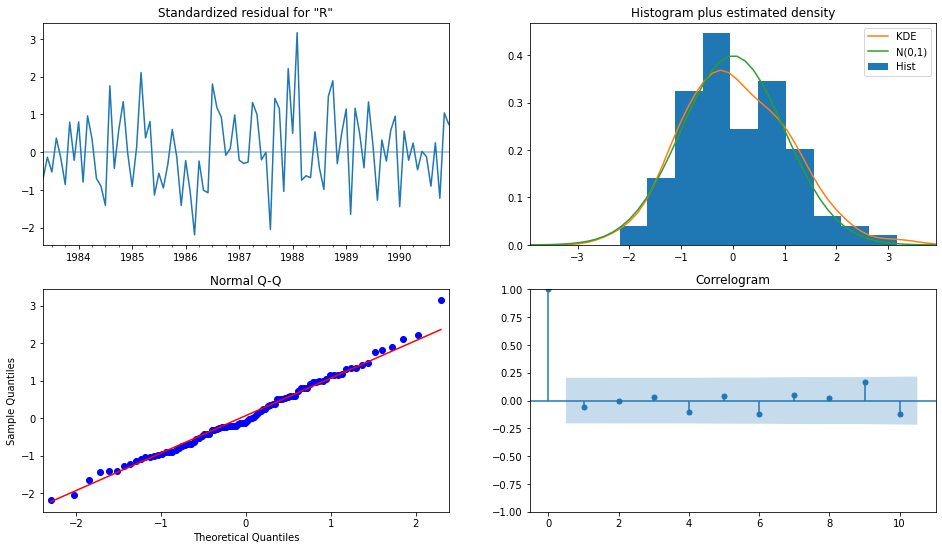

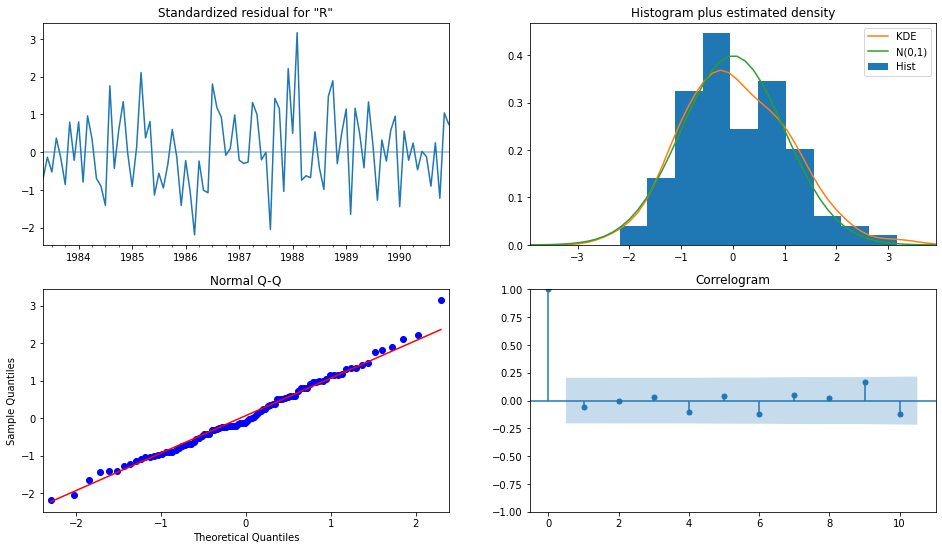

In [259]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

In [260]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [261]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.235993  13.908191      27.976439      82.495548
1991-02-01  68.123412  13.991661      40.700260      95.546563
1991-03-01  67.908821  14.012726      40.444382      95.373260
1991-04-01  66.786259  14.100026      39.150716      94.421802
1991-05-01  69.760162  14.109386      42.106273      97.414051

In [262]:
predicted_auto_SARIMA1

In [263]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.882195867762967 
MAPE: 36.37614198800836


In [264]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.813470       75.840042
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882196       36.376142

In [265]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.813470       75.840042
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882196       36.376142

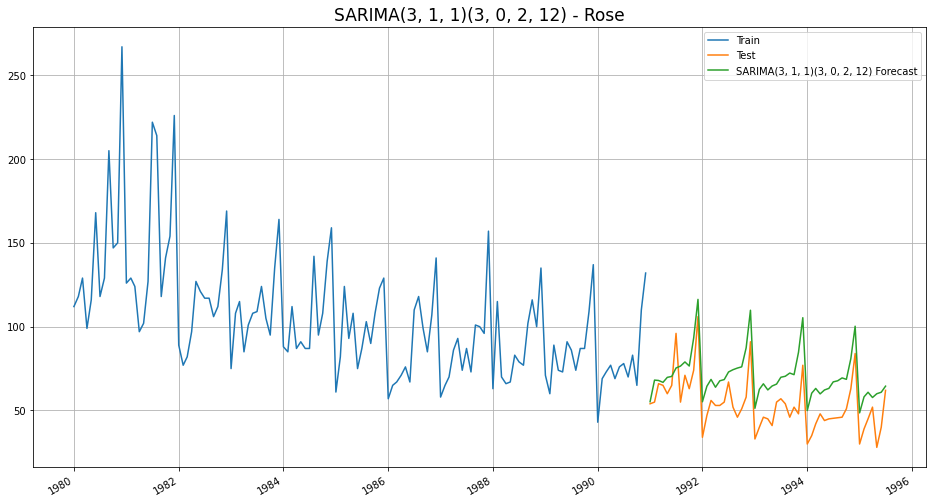

In [266]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

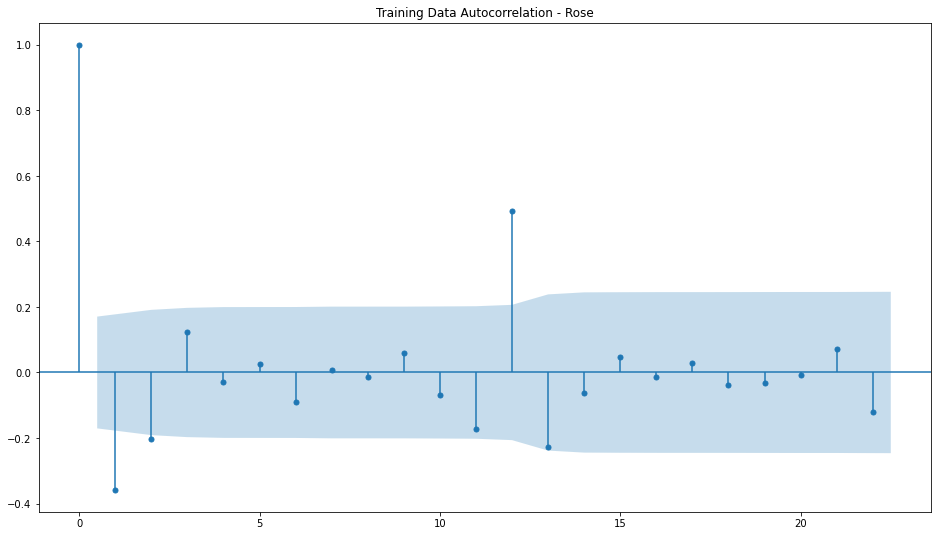

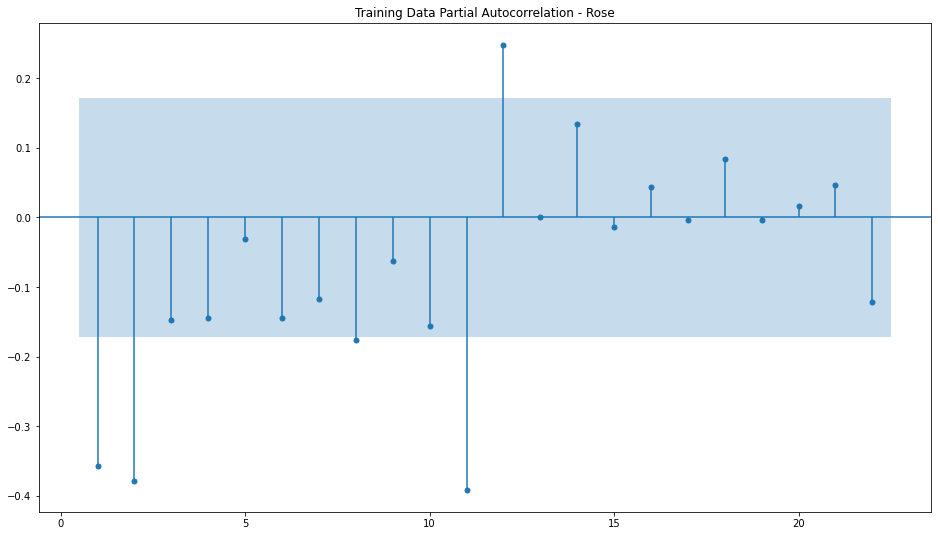

In [267]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [268]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 19 Feb 2022   AIC                            776.996
Time:                                    02:47:39   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.837      0.000      -1.142      -0.568
ar.L2         -0.0021      0.125   

In [269]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 19 Feb 2022   AIC                            689.786
Time:                                    02:47:48   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7095      0.403      1.760      0.078      -0.081       1.500
ar.L2         -0.1504      0.176   

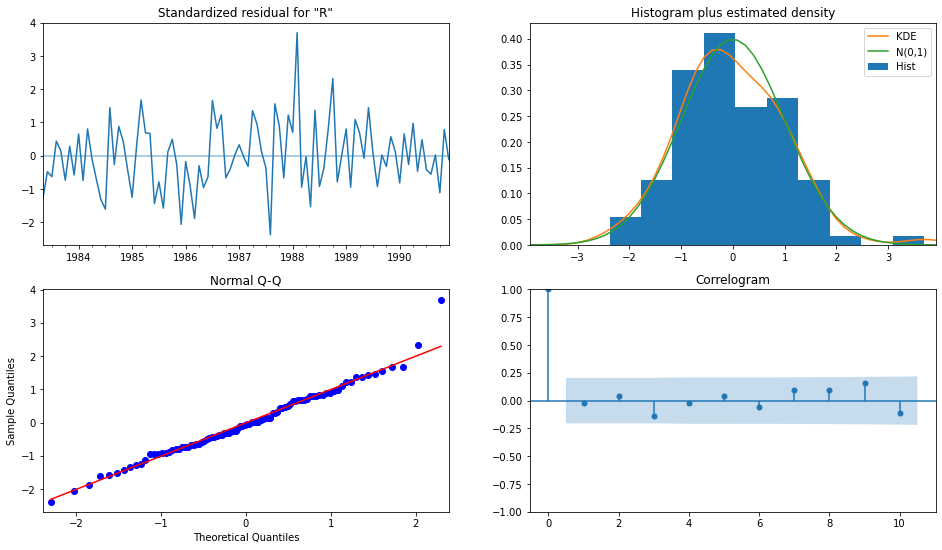

In [270]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

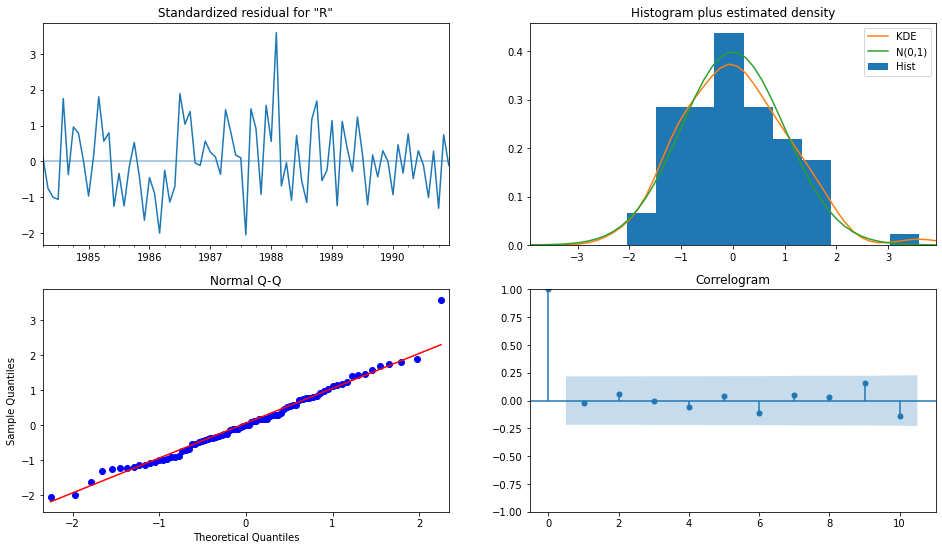

In [271]:
results_manual_SARIMA1.plot_diagnostics()
Splt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

In [272]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [273]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550440252686112 
MAPE: 25.47626192216811


In [274]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.354875945225318 
MAPE: 22.949559023150456


In [275]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.813470       75.840042
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882196       36.376142
SARIMA(2,1,2)(3,1,2,12)            15.354876       22.949559

In [276]:
resultsR0 = resultsDf.copy()

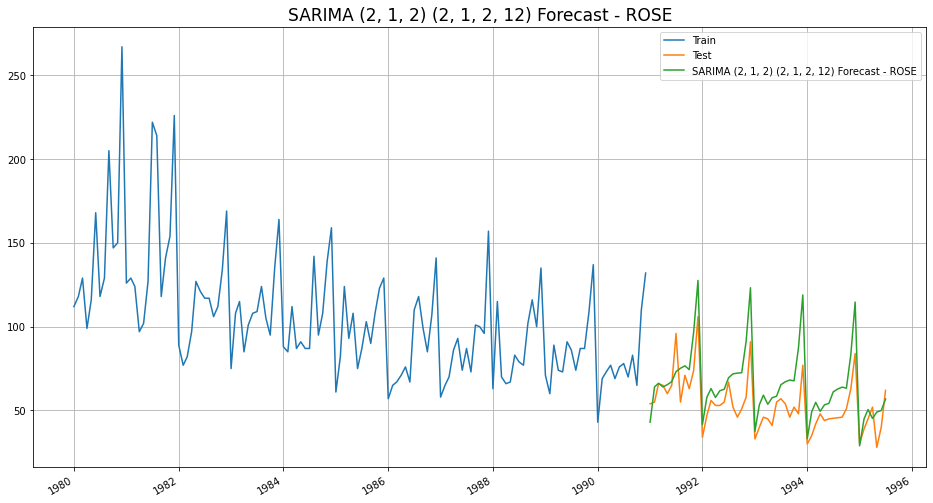

In [277]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

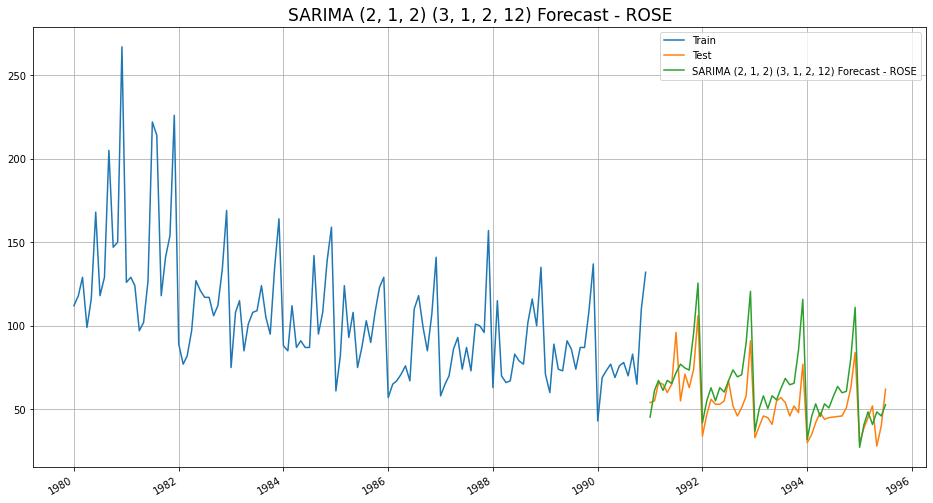

In [278]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

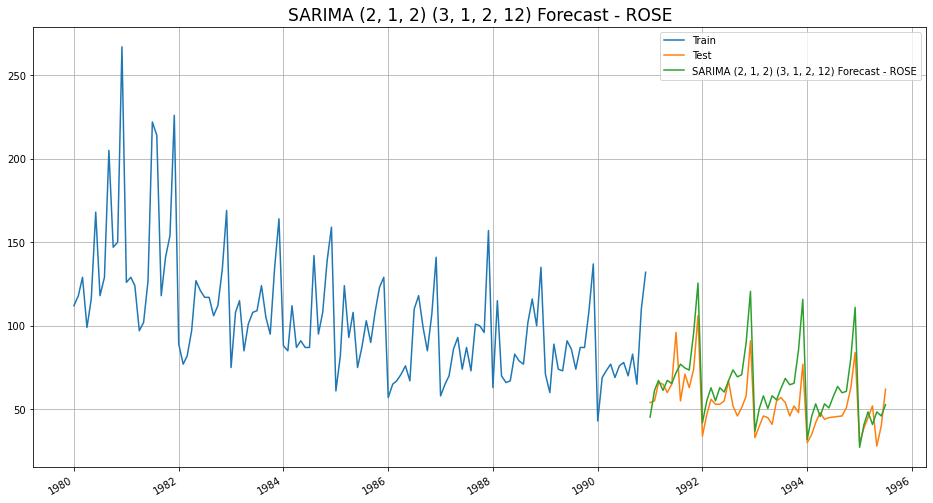

In [279]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

In [280]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 19 Feb 2022   AIC                           1193.062
Time:                                    02:49:49   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.558      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [281]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [282]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083109  12.674238      18.242059      67.924158
1995-09-01  43.341382  12.959987      17.940274      68.742490
1995-10-01  45.826951  12.963982      20.418014      71.235889
1995-11-01  57.397230  13.124699      31.673293      83.121167
1995-12-01  85.074741  13.133526      59.333503     110.815979

In [283]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91090747923502


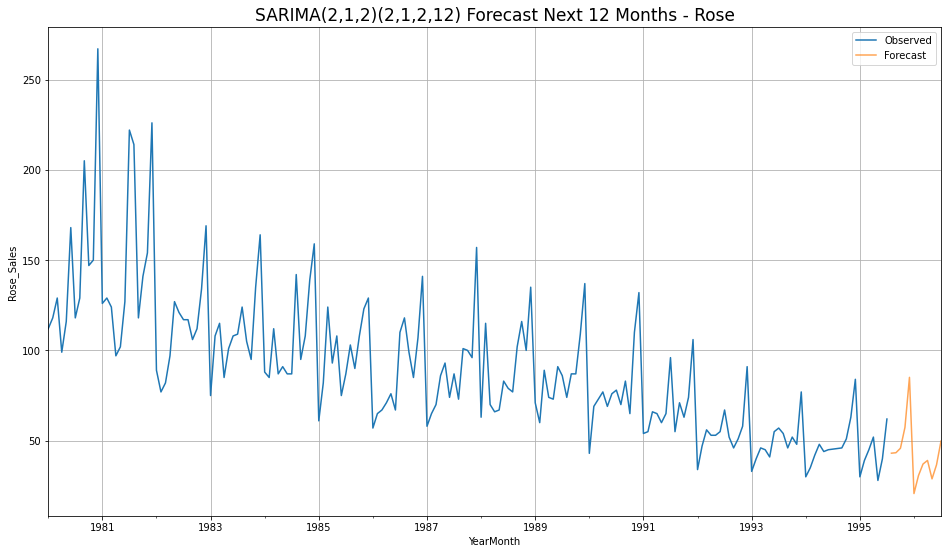

In [291]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [285]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.813470       75.840042
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882196       36.376142
SARIMA(2,1,2)(3,1,2,12)            15.354876       22.949559

In [286]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [287]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
Triple Exponential Smoothing (Additive Season, ...       28.443719   
Triple Exponential Smoothing (Multiplicative Se...       25.808079   
ARIMA(2,1,3)                                             36.813470   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.882196   
SARIMA(2,1,2)(3,1,2,12)                                  15.354876   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.000861   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.625883   
Triple Exponential Smoothing (Multiplicative Se...           402.936179   
Triple Exponential Smoothing (Additive Season, ...           378.625883   
Triple Exponential Smoothing (Multiplicative Se...           352.443503   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.840042  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.376142  
SARIMA(2,1,2)(3,1,2,12)                                  22.949559

In [288]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [289]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.354876       22.949559
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882196       36.376142
ARIMA(2,1,3)                       36.813470       75.840042
ARIMA(2,1,2)                       36.871197       76.056213

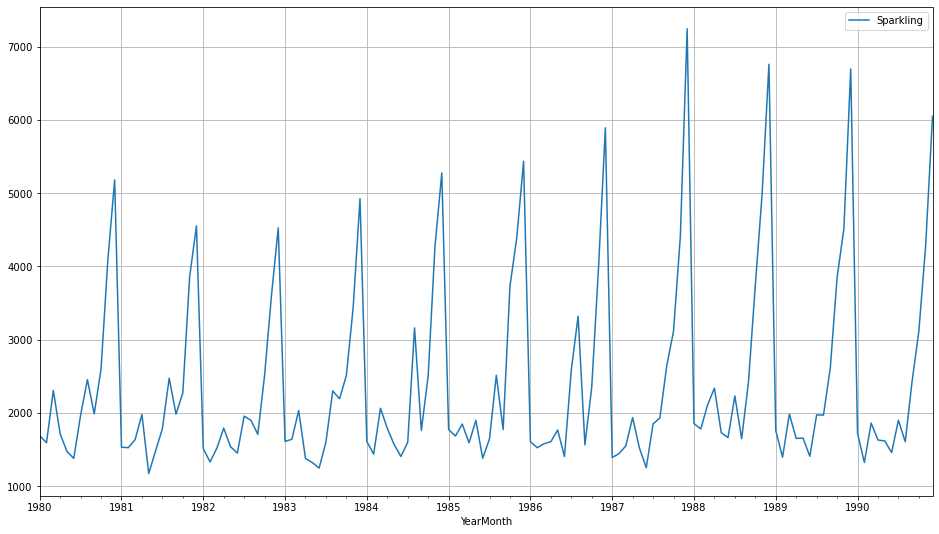

In [292]:
strain.plot(grid=True);

In [293]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593684
Number of lags used 12


In [294]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.47921065551504e-11
Number of lags used 11


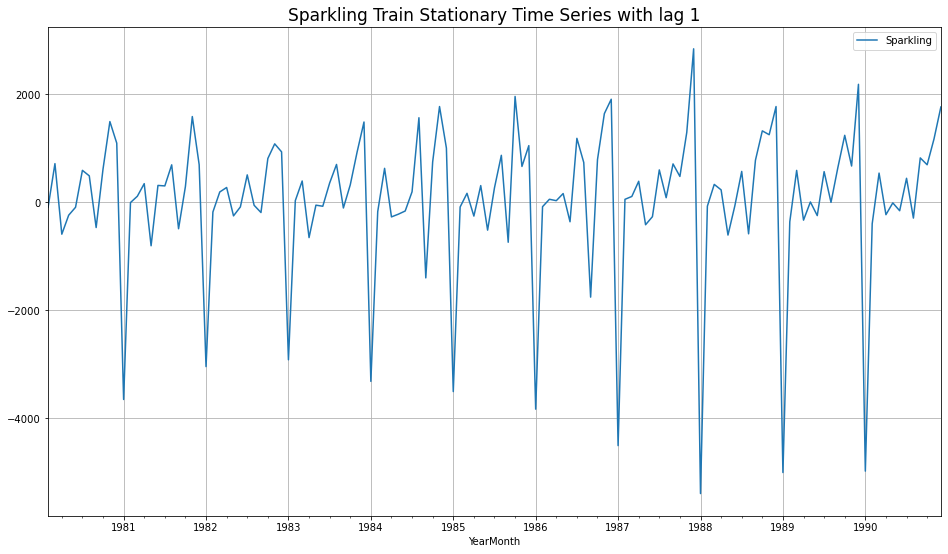

In [295]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [296]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [297]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [298]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [299]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()
    
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212416925


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.825008517658
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [300]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.461689
14  (3, 1, 2)  2230.825009
11  (2, 1, 3)  2232.811211
9   (2, 1, 1)  2233.777626

In [301]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 20 Feb 2022   AIC                           2213.509
Time:                        17:50:36   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

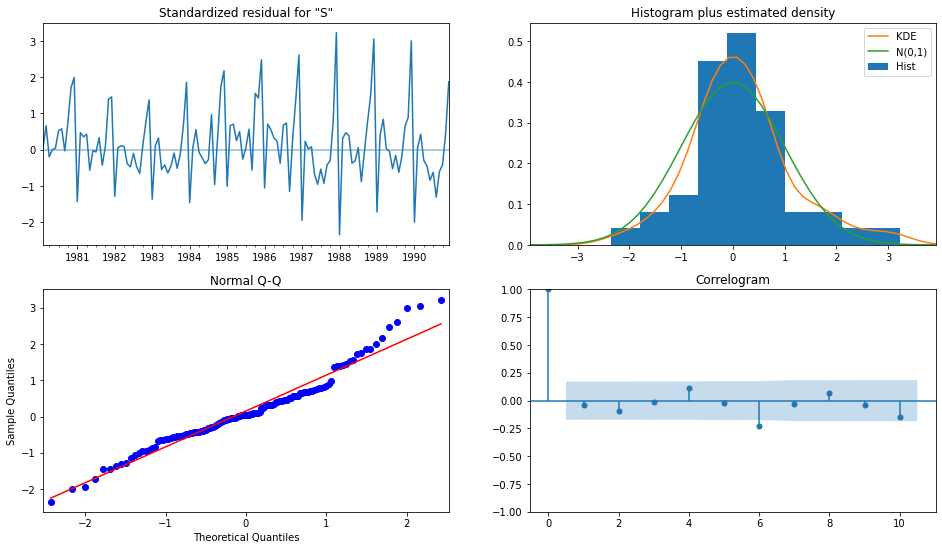

In [302]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

In [303]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [304]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


from sklearn.metrics import mean_squared_error

In [305]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9798208324635 
MAPE: 47.09997350867749


In [306]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf


RMSE       MAPE
ARIMA(2,1,2)  1299.979821  47.099974

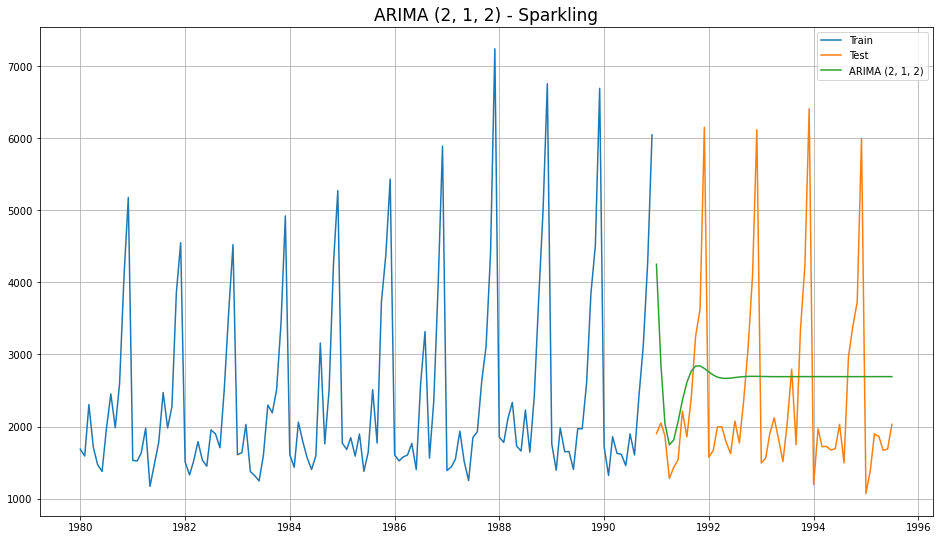

In [307]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

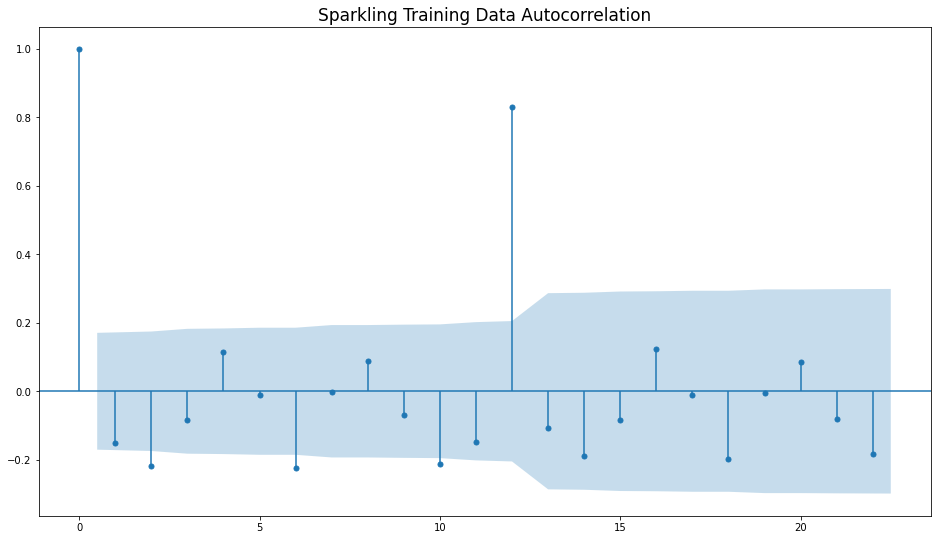

In [308]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');

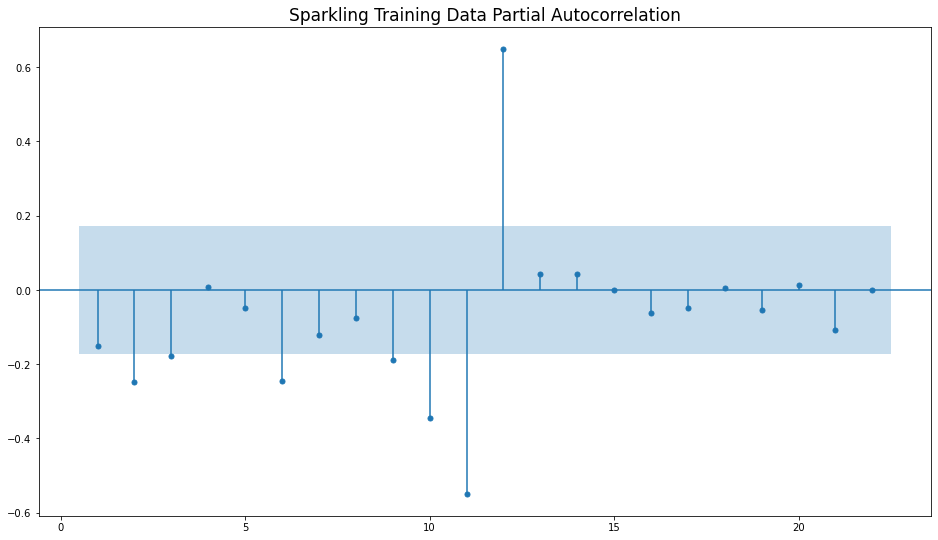

In [309]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');

In [310]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 20 Feb 2022   AIC                           2267.663
Time:                        17:52:30   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


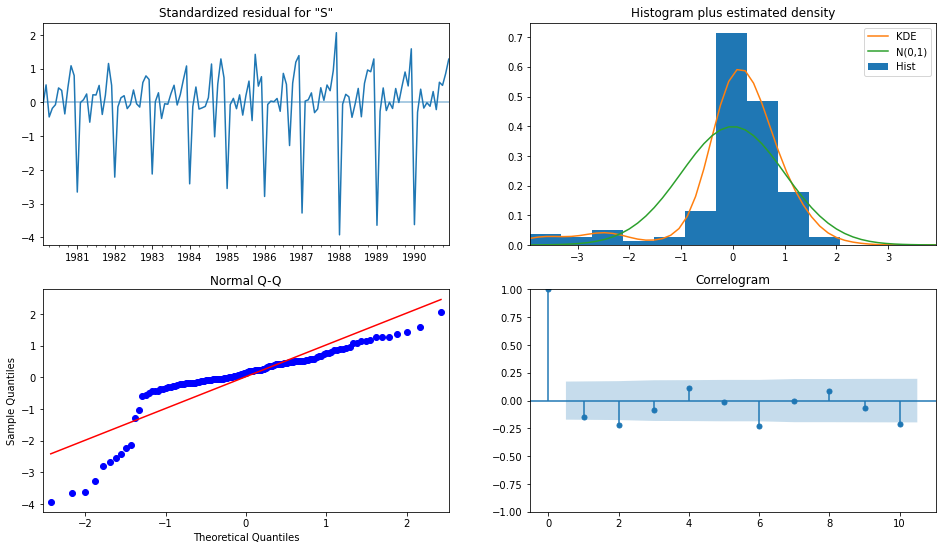

In [311]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

In [312]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [313]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [314]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.979821   47.099974
ARIMA(0,1,0)  3864.279352  201.327650

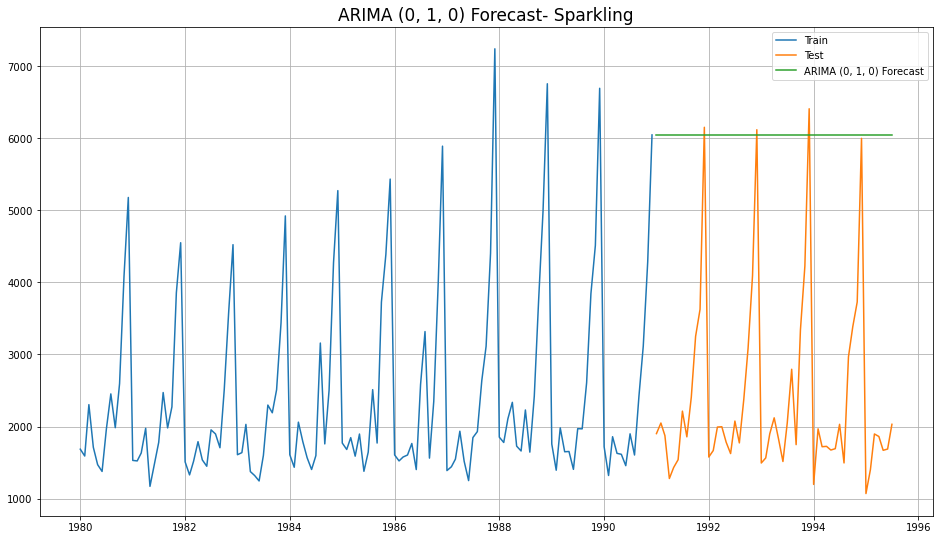

In [315]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

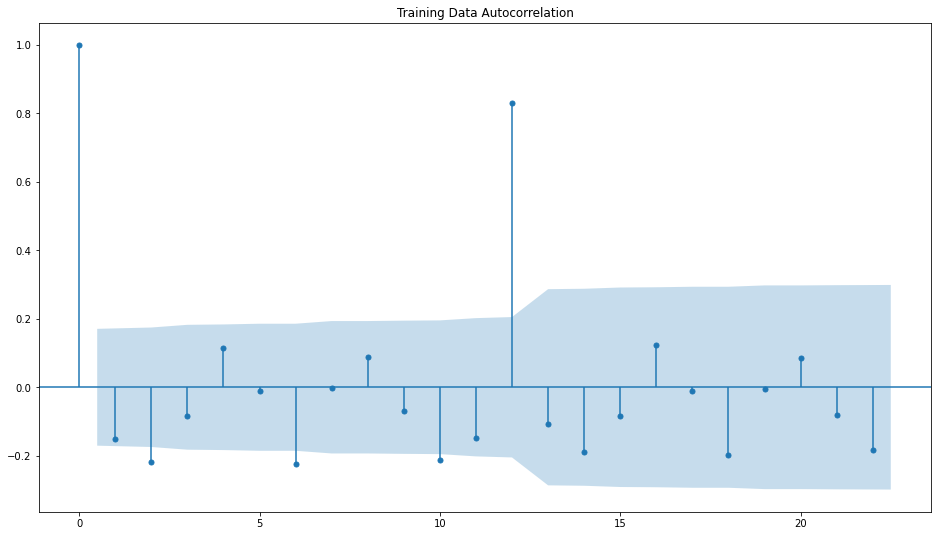

In [316]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [317]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [318]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [319]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023507
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3949.273394518353
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792074


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4260.508708770485
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860455
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920815
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3632.9641057737417
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625374
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065111


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3255.995463731433
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566421
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572983698


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3628.446922050011
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193763033
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144359193


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3263.42552923501
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178712
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085449217
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018825279181


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3229.1049036850154
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.460767961618
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996569673
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.589187382386


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2975.697306881264
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687527
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201373
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890714133


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4226.7435623878655
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332312022
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070991748
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.160506812524


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3866.615481730713
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774455566
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543882324784
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215638724661


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3843.106617021443
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407921233
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370882657
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883846373487


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3594.329314218096
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408440266
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693815249
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661462113


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3258.513906971729
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0301790973087
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077981776
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418977666373


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3287.9125084341154
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580749472
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674826698942
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.04889336575


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2727.8786543345896
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529470066337
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177037645
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544821700168


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2519.754140945098
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990429
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355181


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3854.064824093123
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.244027933163
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359450557
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894405524194


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3566.9503668828606
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128908
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132636154
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.541206743972


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3429.170258660764
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464035906
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780456383
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.766039254033


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3202.0410540191347
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154564
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974130328
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352623269
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3969.940069677421
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424470454335
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332231566
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863615265
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3474.2721449528212
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687877
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223602769
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069969871851


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3206.367092317668
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112082534857
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502484748114
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.090351100138


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3043.7812031778262
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505316
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830749747
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421449314


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4478.620002720487
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259802081927
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871795184658
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842469034967


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4132.074592801453
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932039863
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1588.3226223496508
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.0767707317339


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4092.0792191029664
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394792497
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146974725286
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.969033726648


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3840.1100781773844
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039778062
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938150687233
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.521766362093


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3504.9414955942107
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596428409
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955491419717
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5053499020646


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3246.382335323419
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154052138383
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669040433742
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.2449108578205


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3092.908946795143
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723333723507
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686989736
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649214087296


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2846.720022089947
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435407906
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303980918


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3720.014294291778
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066060363
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349663399
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702205458434


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3646.927706817416
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464844328
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344988118321
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191759717935


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3056.582189139091
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803059
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620365355
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975681741703
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3344.5353218096175
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131455163
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496025843
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.42340803343


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3950.473468243623
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429034113
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125436165
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888285380869


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3437.2631423960056
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896922
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596300826325
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342863303183
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3601.260484716358
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327192704
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130756763638
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241352878326


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3168.456628042045
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114771516
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372608758158
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433048966


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3760.215791151712
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140935579478
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3767693060447
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404058650756
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3543.562352314594
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.9010784492957
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476005641451
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893214819386


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3418.4241797871196
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376150605267
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036127016476
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4359078058615


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3065.8633961732867
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395885242024
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057322460649
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7076157652536
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3910.513242014096
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.045735131789
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1713.8648805048429
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.507925568563


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3503.76617509509
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6943736795815
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7793379683308
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1544.724089971345


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3527.828985803491
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789854018017
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992292205852
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2762964333642
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3278.996927801511
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418917
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923151563


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3990.514717752773
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703206
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783840837125
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471969157015


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3813.538691089796
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025569301
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812789888
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680822443076
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3639.7901673307047
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862055817
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774715048866
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074686146524


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3164.766378223801
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983400584
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690700826775
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234051529215
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3994.0629835969257
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518696487
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085043480892
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.684496606061


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2518.5490293800267
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505331538
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295662583854
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498118695


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3566.4621071823576
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331371707
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814837567676
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959117539857


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3298.1784257762315
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.31472715611
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804323669582
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255002456132


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3694.8653441299116
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.963586595066
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.365040142282
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364181609426
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2921.035312877243
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9501943827645
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894244078345
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091492229137


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3552.1212511389135
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.9247380867641
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602611792299
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7144897018036


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3312.8562723365103
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542045894
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931112329866
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.782996118376


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:1913.8926397523935
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7426296512904
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1715.7503603953535
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3936064066272
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3534.1685294414037
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762937909345
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915683279542
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7744925945694


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3431.4932272652563
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970044525373
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698614339145
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926322868105


C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3248.769878921558


In [320]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497004
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195912
238  (3, 1, 2)  (3, 0, 2, 12)  1389.714490
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692632
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169861
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677472
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307469
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789854
236  (3, 1, 2)  (3, 0, 0, 12)  1400.924738
190  (2, 1, 3)  (3, 0, 2, 12)  1401.276296
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437615
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.503613
157  (2, 1, 1)  (3, 0, 1, 12)  1403.130757
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435908
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824135
189  (2, 1, 3)  (3, 0, 1, 12)  1403.992292
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810239
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197568
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911208
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914697
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950248
110  (1, 1, 2)  (3, 0, 2, 12)  1415.969034
125  (1, 1, 3)  (3, 0, 1, 12)  1416.750969
94   (1, 1, 1)  (3, 0, 2, 12)  1417.090351
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764921
28   (0, 1, 1)  (3, 0, 0, 12)  1428.460768
44   (0, 1, 2)  (3, 0, 0, 12)  1428.599341
29   (0, 1, 1)  (3, 0, 1, 12)  1428.872800
30   (0, 1, 1)  (3, 0, 2, 12)  1429.589187
60   (0, 1, 3)  (3, 0, 0, 12)  1429.652947
45   (0, 1, 2)  (3, 0, 1, 12)  1429.744837
46   (0, 1, 2)  (3, 0, 2, 12)  1430.688385

In [321]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sun, 20 Feb 2022   AIC                           1387.788
Time:                                     18:04:56   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

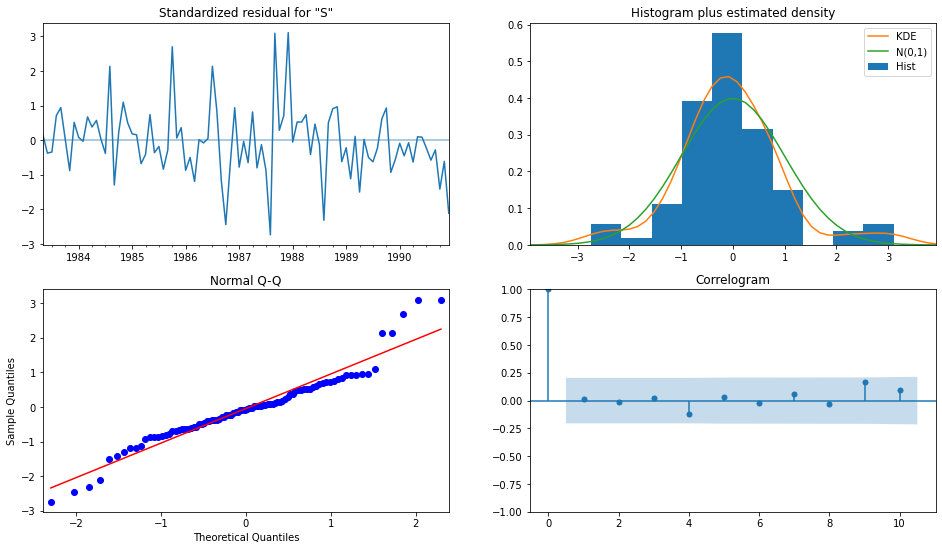

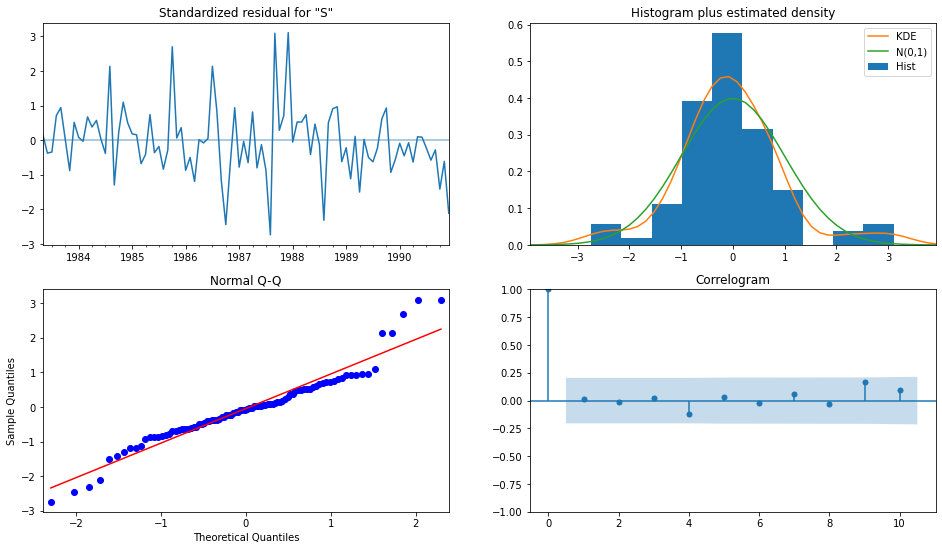

In [322]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

In [323]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [324]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.352969  415.861319     574.279761    2204.426178
1991-02-01  1224.672450  427.866006     386.070488    2063.274412
1991-03-01  1673.337773  428.010513     834.452583    2512.222963
1991-04-01  1533.304740  432.773829     685.083621    2381.525859
1991-05-01  1425.949551  435.887629     571.625497    2280.273605

In [325]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2433615993934 
MAPE: 25.870670481807455


In [326]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979821   47.099974
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243362   25.870670

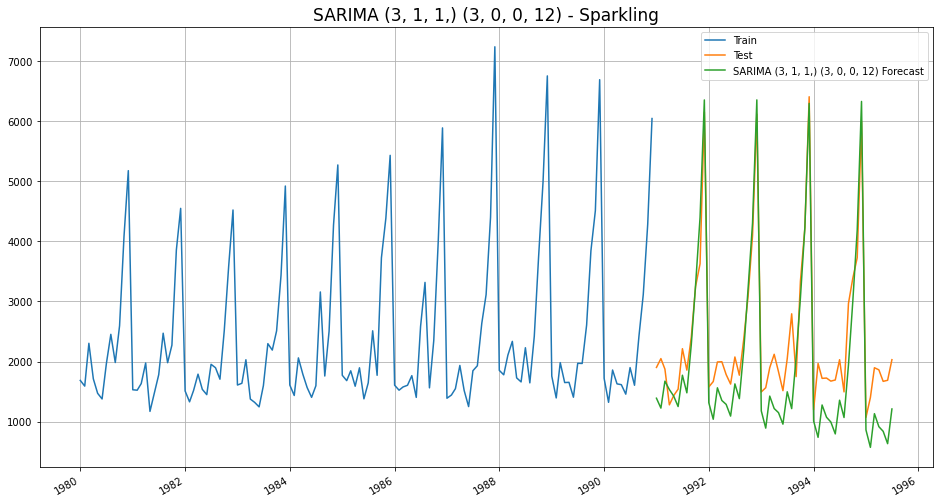

In [327]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

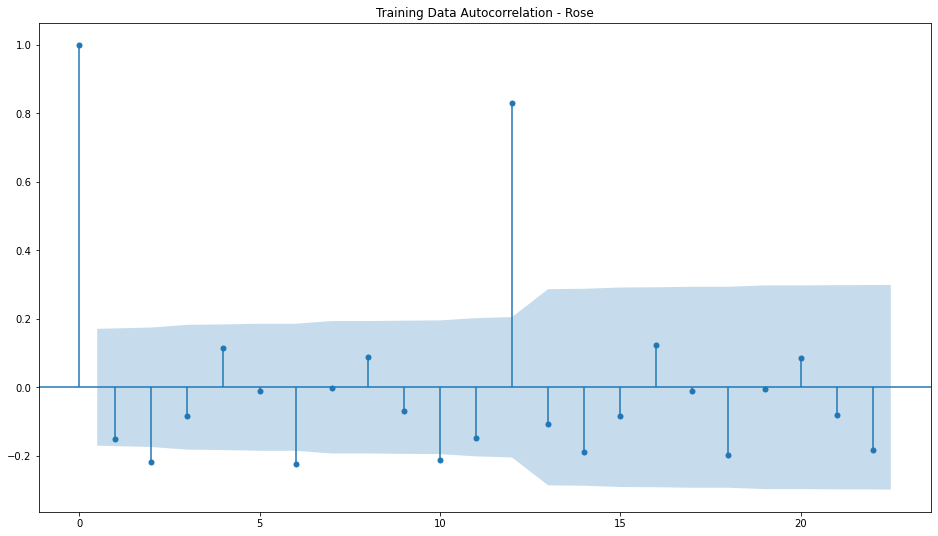

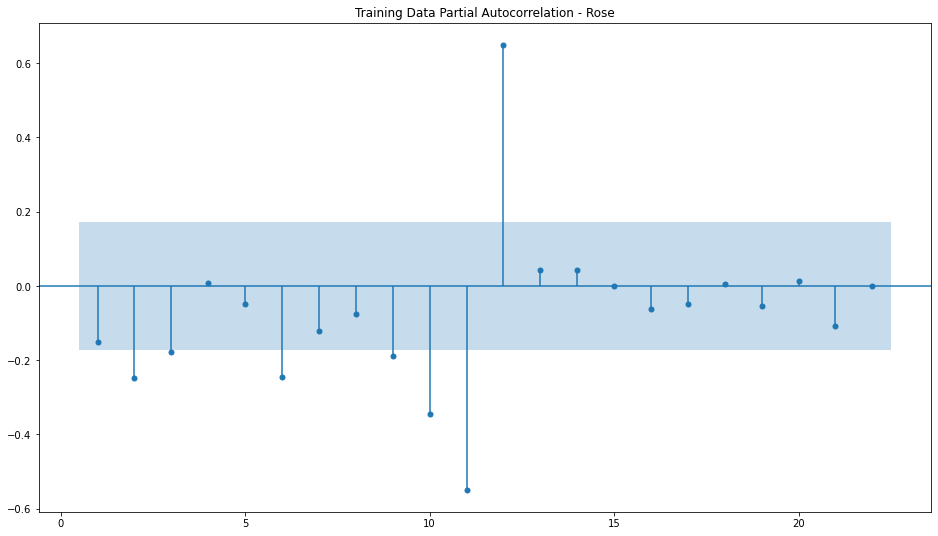

In [328]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');


In [329]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sun, 20 Feb 2022   AIC                           1628.324
Time:                                      18:04:59   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [330]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 20 Feb 2022   AIC                           1455.991
Time:                                         18:05:00   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [331]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sun, 20 Feb 2022   AIC                           1288.607
Time:                                         18:05:03   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

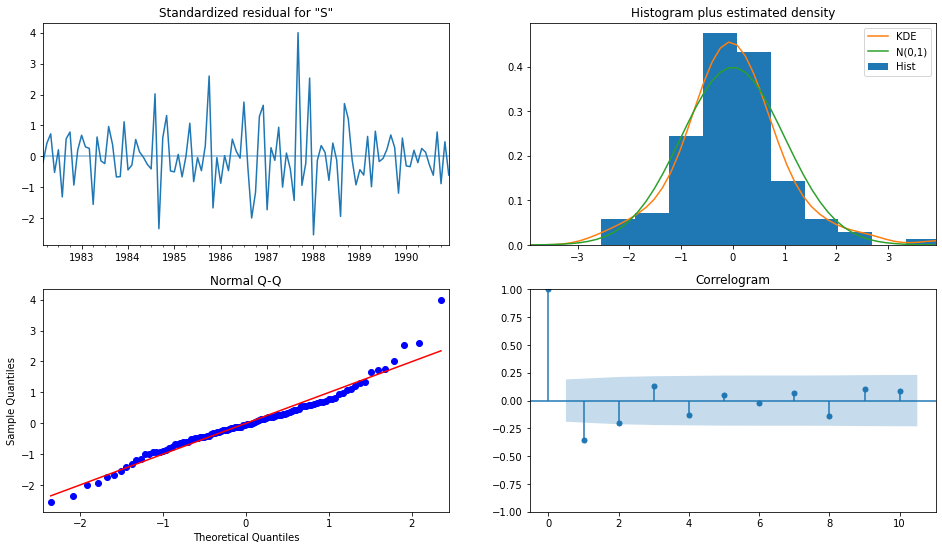

In [332]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

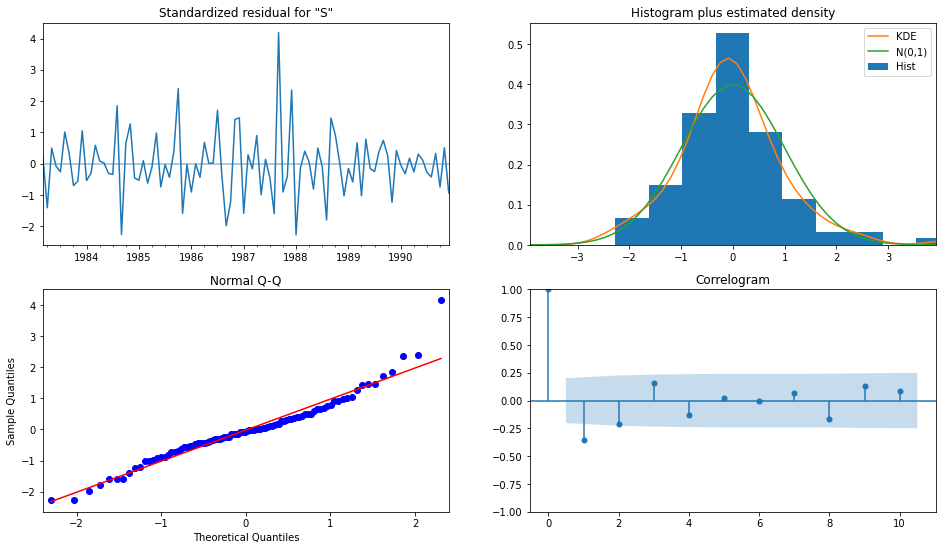

In [333]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

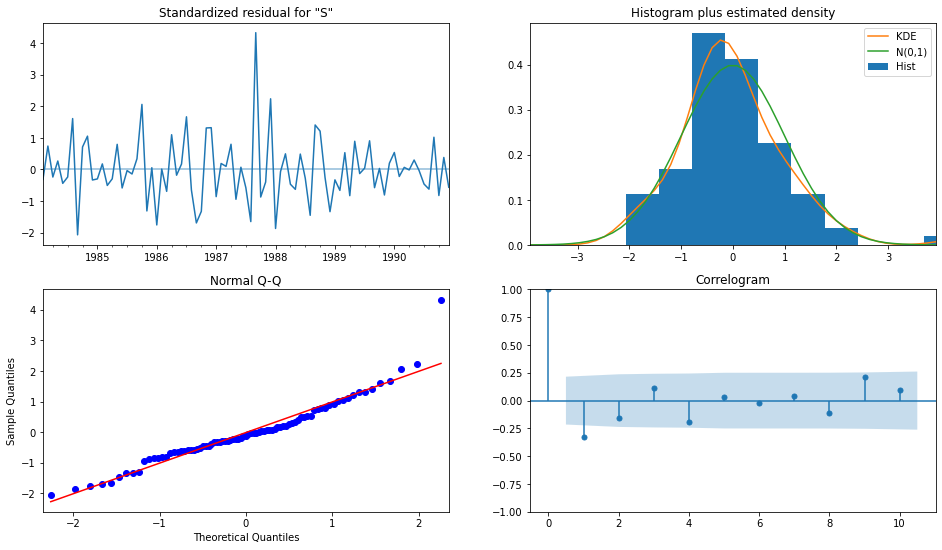

In [334]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

In [335]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [336]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357891698454 
MAPE: 54.87253598776217


In [337]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7276269729955 
MAPE: 81.78526941798113


In [338]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6469963080924 
MAPE: 71.56623047726522


In [339]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979821   47.099974
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243362   25.870670
SARIMA(0,1,0)(3,1,2,12)  1189.835789   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727627   81.785269
SARIMA(0,1,0)(3,1,2,12)  1551.646996   71.566230

In [340]:
resultsR0 = resultsDf.copy()

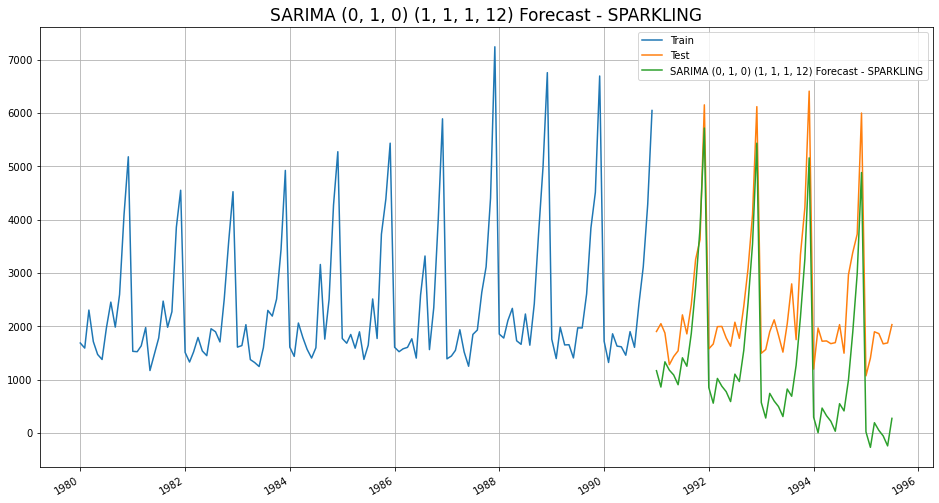

In [341]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

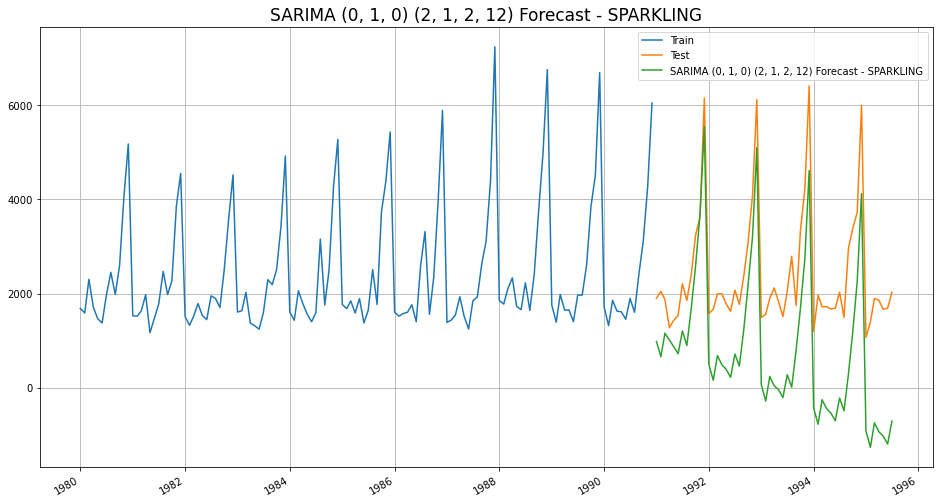

In [342]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

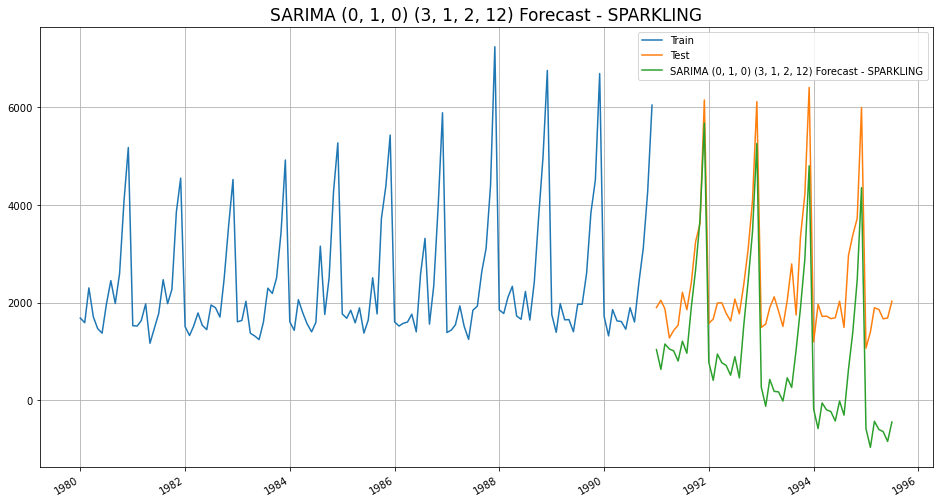

In [343]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

In [344]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 20 Feb 2022   AIC                           1193.062
Time:                                    18:05:14   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.558      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [345]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [346]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083109  12.674238      18.242059      67.924158
1995-09-01  43.341382  12.959987      17.940274      68.742490
1995-10-01  45.826951  12.963982      20.418014      71.235889
1995-11-01  57.397230  13.124699      31.673293      83.121167
1995-12-01  85.074741  13.133526      59.333503     110.815979

In [347]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91090747923502


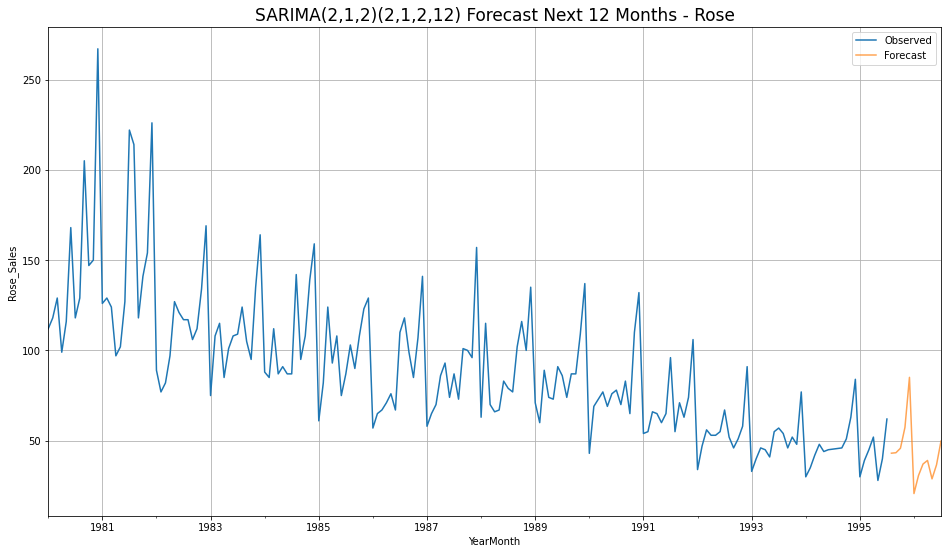

In [348]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [349]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.979821   47.099974
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.243362   25.870670
SARIMA(0,1,0)(3,1,2,12)  1189.835789   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727627   81.785269
SARIMA(0,1,0)(3,1,2,12)  1551.646996   71.566230

In [350]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [351]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
Triple Exponential Smoothing (Additive Season, ...       28.443719   
Triple Exponential Smoothing (Multiplicative Se...       25.808079   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.000861   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.625883   
Triple Exponential Smoothing (Multiplicative Se...           402.936179   
Triple Exponential Smoothing (Additive Season, ...           378.625883   
Triple Exponential Smoothing (Multiplicative Se...           352.443503   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9

In [352]:
results_all_spark.to_csv('results_all_spark.csv')

In [353]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [354]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [355]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']
MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [356]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [357]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

In [358]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)
    
yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

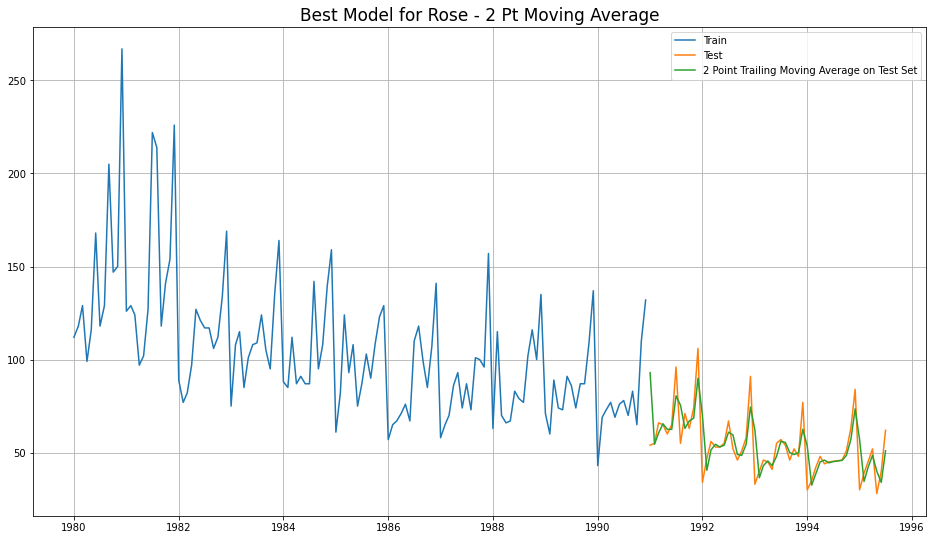

In [364]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

In [369]:
dfr1 = pd.read_csv('C:\\Users\\srivi\\Downloads\\Rose.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

KeyError: 'forecast'

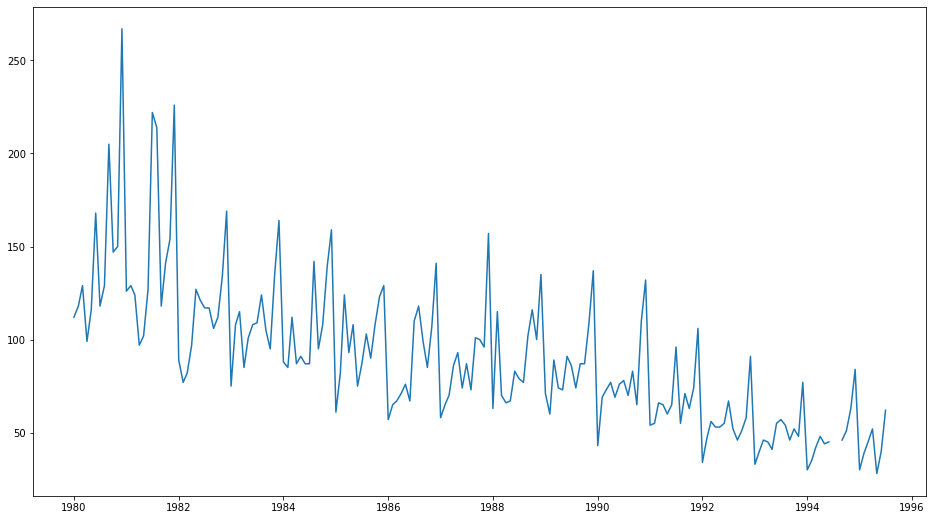

In [384]:
plt.figure(figsize=(16,9))
plt.plot(dfr1['Rose'], label='Full data Rose')
plt.plot(dfr1['forecast'].iloc[-12:], label='Forecast on next 12 months')

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - 2 Pt MA', fontsize=17);

plt.savefig('rose_forecast_2ptma.jpg', bbox_inches='tight');

In [372]:
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07563887195343129, 'smoothing_trend': 0.06484411503585433, 'smoothing_seasonal': 0.27361084489565535, 'damping_trend': 0.990004915678848, 'initial_level': 2355.31051871489, 'initial_trend': -23.585947534514315, 'initial_seasons': array([0.7426846 , 0.69187231, 0.8990388 , 0.8091633 , 0.67900873,
       0.66478358, 0.89541716, 1.1591083 , 0.94345151, 1.28511212,
       1.96880921, 2.5687552 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [375]:
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

1995-08-01    1931.704859
1995-09-01    2351.875965
1995-10-01    3179.753418
1995-11-01    3918.953951
1995-12-01    5987.463157
1996-01-01    1357.834118
1996-02-01    1599.173601
1996-03-01    1830.359090
1996-04-01    1790.952630
1996-05-01    1641.911102
1996-06-01    1556.298069
1996-07-01    1965.836524
Freq: MS, dtype: float64

In [376]:
plt.rcParams["figure.figsize"] = [16,9]

In [377]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1254.272078  1931.704859  2609.137640
1995-09-01  1674.443184  2351.875965  3029.308746
1995-10-01  2502.320637  3179.753418  3857.186199
1995-11-01  3241.521170  3918.953951  4596.386732
1995-12-01  5310.030376  5987.463157  6664.895938

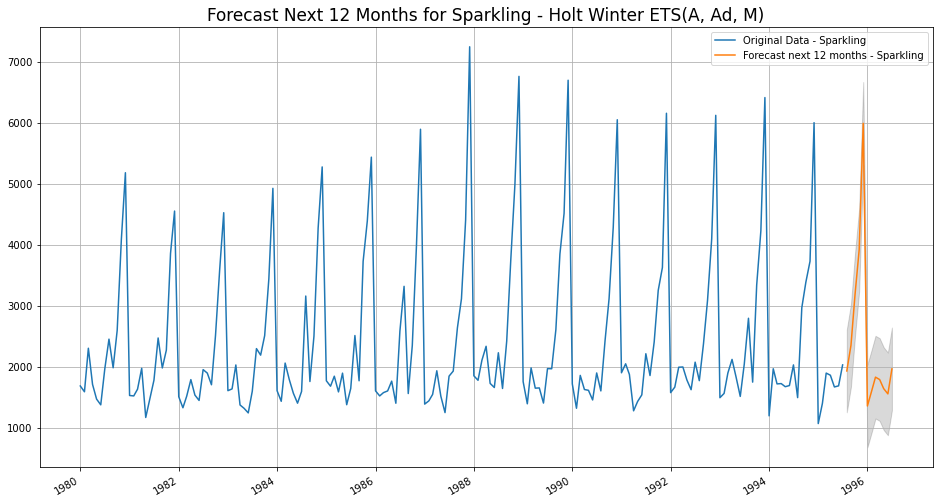

In [378]:
plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

In [379]:
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\srivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10004205357726026, 'smoothing_trend': 0.005460931332325488, 'smoothing_seasonal': 0.002369189635224424, 'damping_trend': nan, 'initial_level': 146.15301435958608, 'initial_trend': -0.5547071735515288, 'initial_seasons': array([-27.99255907, -17.21137823,  -9.15141909, -15.79697167,
       -11.86552002,  -5.86732672,   5.30883239,   5.42478795,
         2.77609689,   2.057545  ,  17.1829741 ,  55.90232469]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [380]:
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

1995-08-01    50.123621
1995-09-01    46.952806
1995-10-01    45.709683
1995-11-01    60.308535
1995-12-01    98.500361
1996-01-01    14.085685
1996-02-01    24.343326
1996-03-01    31.877575
1996-04-01    24.708757
1996-05-01    28.108126
1996-06-01    33.580485
1996-07-01    44.200468
Freq: MS, dtype: float64

In [381]:
plt.rcParams["figure.figsize"] = [16,9]

In [382]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  15.294978   50.123621   84.952264
1995-09-01  12.124163   46.952806   81.781450
1995-10-01  10.881040   45.709683   80.538327
1995-11-01  25.479891   60.308535   95.137178
1995-12-01  63.671718   98.500361  133.329005

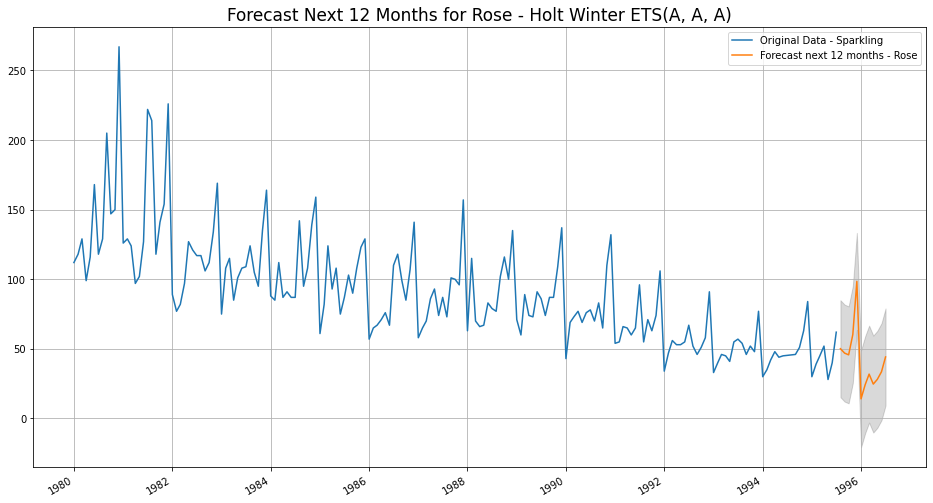

In [383]:
plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');